This is a test notebook to refresh my data analysis and data manipulation skills in Python.

In [154]:
#########################################################################################
# 500 Cities Data Analysis - basic code
# Written by Michelle Schmitz, originally in Jupyter notebooks and then in Python code.
# Initially written on 02 March 2019
#########################################################################################

In [155]:
# Importing in pandas and numpy libraries to handle data management aspects of the dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import geopandas as gpd 

# As of 3/3/2019, geopandas does not work here - I am exporting my cleaned indicator dataframe into a CSV, 
# and linking the code on Github.

pd.set_option('max_columns', 50)
%matplotlib inline

In [156]:
# NOT INCLUDING THE SQLITE LIBRARY IN MY FINAL ANALYSIS, BUT I DID WANT TO KEEP IT HERE FOR FUTURE REFERENCE
# and the sqlite3 library so I can select certain rows and output them as certain objects to manipulate
# also including the Error library so I can see what's wrong if I'm writing SQL queries

#from pandas.io import sql
#import sqlite3
#from sqlite3 import Error

In [157]:
# reading in the 500 Cities data set, created by the CDC's Division of Population Health (2018 release)
#
# note - this is NOT related to my current position at CDC - I just know about this dataset, and I love its concept

In [158]:
### IN CASE IF I WANT TO READ IN THE CSV DOWNLOADED INTO MY COMPUTER

# reading in the dataset and looking at the first few rows.
# changing my user directory to be Downloads

#%cd C:\Users\mmsch\Downloads

#data_500_cities = pd.read_csv('500_Cities__Local_Data_for_Better_Health__2018_release.csv')


In [159]:
### IN CASE IF I WANT TO READ IN THE CSV URL THAT'S ON THE INTERNET - takes longer but more applicable/more sharable

# Reading in the CSV of the 500 cities dataset

## This is the original dataset's link:
# read.csv("https://catalog.data.gov/dataset/500-cities-local-data-for-better-health-b32fd/resource/8a49a1f7-4fcc-49a6-acb5-fcd3c0796782")

#url = 'https://data.cdc.gov/api/views/6vp6-wxuq/rows.csv?accessType=DOWNLOAD'
url = ('https://data.cdc.gov/api/views/6vp6-wxuq/rows.csv')

data_500_cities = pd.read_csv(url)

# Looking at the first few rows of the dataset and getting information about the dataset - 
# just to make sure I got the correct dataset!
data_500_cities.head(3)

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2016,US,United States,NaN,US,BRFSS,Prevention,59,Current lack of health insurance among adults ...,%,AgeAdjPrv,Age-adjusted prevalence,14.6,14.3,14.9,NaN,NaN,308745538,NaN,PREVENT,ACCESS2,NaN,NaN,Health Insurance
1,2016,US,United States,NaN,US,BRFSS,Prevention,59,Current lack of health insurance among adults ...,%,CrdPrv,Crude prevalence,11.6,11.3,11.8,NaN,NaN,308745538,NaN,PREVENT,ACCESS2,NaN,NaN,Health Insurance
2,2016,US,United States,NaN,US,BRFSS,Health Outcomes,59,Arthritis among adults aged >=18 Years,%,AgeAdjPrv,Age-adjusted prevalence,23.0,22.8,23.2,NaN,NaN,308745538,NaN,HLTHOUT,ARTHRITIS,NaN,NaN,Arthritis


In [160]:
# Checking one of the non-overall courses

data_500_cities[data_500_cities.StateAbbr == 'AL'].head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
56,2016,AL,Alabama,Birmingham,City,BRFSS,Prevention,0107000,Current lack of health insurance among adults ...,%,AgeAdjPrv,Age-adjusted prevalence,19.5,19.1,19.9,NaN,NaN,212237,"(33.5275663773, -86.7988174678)",PREVENT,ACCESS2,107000.0,NaN,Health Insurance
57,2016,AL,Alabama,Birmingham,City,BRFSS,Prevention,0107000,Current lack of health insurance among adults ...,%,CrdPrv,Crude prevalence,19.2,18.8,19.5,NaN,NaN,212237,"(33.5275663773, -86.7988174678)",PREVENT,ACCESS2,107000.0,NaN,Health Insurance
58,2016,AL,Alabama,Birmingham,Census Tract,BRFSS,Prevention,0107000-01073000100,Current lack of health insurance among adults ...,%,CrdPrv,Crude prevalence,23.3,20.6,26.3,NaN,NaN,3042,"(33.5794328326, -86.7228323926)",PREVENT,ACCESS2,107000.0,1.073000e+09,Health Insurance
59,2016,AL,Alabama,Birmingham,Census Tract,BRFSS,Prevention,0107000-01073000300,Current lack of health insurance among adults ...,%,CrdPrv,Crude prevalence,28.5,25.2,31.7,NaN,NaN,2735,"(33.5428208686, -86.752433978)",PREVENT,ACCESS2,107000.0,1.073000e+09,Health Insurance
60,2016,AL,Alabama,Birmingham,Census Tract,BRFSS,Prevention,0107000-01073000400,Current lack of health insurance among adults ...,%,CrdPrv,Crude prevalence,23.9,20.5,27.6,NaN,NaN,3338,"(33.5632449633, -86.7640474064)",PREVENT,ACCESS2,107000.0,1.073000e+09,Health Insurance


In [161]:
# doing more specific descriptive checks for all of the data - and the numeric data in particular
data_500_cities.info() #basic information about the dataset
data_500_cities.dtypes
data_500_cities.describe() 
#the above is descriptive statistics for all numeric variables 
# (including FIPS codes, which doesn't make a ton of sense - but would be interesting to map out!)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810103 entries, 0 to 810102
Data columns (total 24 columns):
Year                          810103 non-null int64
StateAbbr                     810103 non-null object
StateDesc                     810103 non-null object
CityName                      810047 non-null object
GeographicLevel               810103 non-null object
DataSource                    810103 non-null object
Category                      810103 non-null object
UniqueID                      810103 non-null object
Measure                       810103 non-null object
Data_Value_Unit               810103 non-null object
DataValueTypeID               810103 non-null object
Data_Value_Type               810103 non-null object
Data_Value                    787311 non-null float64
Low_Confidence_Limit          787311 non-null float64
High_Confidence_Limit         787311 non-null float64
Data_Value_Footnote_Symbol    22794 non-null object
Data_Value_Footnote           22794 non-

,Year,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,PopulationCount,CityFIPS,TractFIPS
count,810103.000000,787311.000000,787311.000000,787311.000000,8.101030e+05,8.100470e+05,7.820470e+05
mean,2015.856779,31.224884,29.488202,32.979995,3.202413e+04,2.606307e+06,2.592907e+10
std,0.350299,25.815357,25.341553,26.245761,2.568489e+06,1.686183e+06,1.675378e+10
min,2015.000000,0.200000,0.100000,0.200000,1.000000e+00,1.500300e+04,1.073000e+09
25%,2016.000000,9.800000,8.700000,11.000000,2.405000e+03,6.813440e+05,8.001009e+09
50%,2016.000000,22.800000,20.500000,25.100000,3.632000e+03,2.622000e+06,2.608100e+10
75%,2016.000000,46.000000,43.100000,49.200000,5.040000e+03,4.055000e+06,4.010911e+10
max,2016.000000,95.500000,94.100000,96.500000,3.087455e+08,5.613900e+06,5.602100e+10


In [162]:
# I'm most interested in the Measures variable - but I want to see what the categorical values are 
# of the Measures variable - so I'm creating a series object to look at this

#Col_Measure = ['Measure','Data_Value'] # only selecting out the Measure column
Col_Measure = ['CityName','StateAbbr','DataValueTypeID','Measure','Data_Value','Low_Confidence_Limit','High_Confidence_Limit','CityFIPS','TractFIPS','PopulationCount','GeoLocation','UniqueID'] 
print(Col_Measure)

['CityName', 'StateAbbr', 'DataValueTypeID', 'Measure', 'Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'CityFIPS', 'TractFIPS', 'PopulationCount', 'GeoLocation', 'UniqueID']


In [163]:
# Pivot for Age-Adjusted Prevalence (updated)
#pivot = pd.pivot_table(data_500_cities[Col_Measure], values=['Low_Confidence_Limit','Data_Value','High_Confidence_Limit'], index='Measure', margins=False, dropna=False, margins_name='All',aggfunc={'Low_Confidence_Limit': np.mean, 'Data_Value': np.mean,'High_Confidence_Limit': np.mean})
pivot1 = pd.pivot_table(data_500_cities[Col_Measure][(data_500_cities.DataValueTypeID == 'AgeAdjPrv') & (data_500_cities.StateAbbr == 'US')], values=['Low_Confidence_Limit','Data_Value','High_Confidence_Limit'], index='Measure', margins=False, dropna=False, aggfunc={'Low_Confidence_Limit': np.mean, 'Data_Value': np.mean,'High_Confidence_Limit': np.mean})
pivot1
#print(pivot1)

,Data_Value,High_Confidence_Limit,Low_Confidence_Limit
Measure,,,
All teeth lost among adults aged >=65 Years,15.0,15.4,14.6
Arthritis among adults aged >=18 Years,23.0,23.2,22.8
Binge drinking among adults aged >=18 Years,18.0,18.2,17.7
Cancer (excluding skin cancer) among adults aged >=18 Years,5.9,6.0,5.8
Cholesterol screening among adults aged >=18 Years,75.2,75.5,74.9
Chronic kidney disease among adults aged >=18 Years,2.7,2.8,2.6
Chronic obstructive pulmonary disease among adults aged >=18 Years,6.0,6.1,5.8
Coronary heart disease among adults aged >=18 Years,5.8,5.9,5.7
Current asthma among adults aged >=18 Years,8.8,9.0,8.7


In [164]:
#attempting pivot #2 - this time of values ONLY for the US
#pivot2 = pd.pivot_table(data_500_cities[Col_Measure][data_500_cities.StateAbbr == 'US'], index='Measure', values='Data_Value', margins=False, dropna=False)
#print(pivot2)

# Pivot for Crude Prevalence (updated)
pivot2 = pd.pivot_table(data_500_cities[Col_Measure][(data_500_cities.DataValueTypeID == 'CrdPrv') & (data_500_cities.StateAbbr == 'US')], values=['Low_Confidence_Limit','Data_Value','High_Confidence_Limit'], index='Measure', margins=False, dropna=False, aggfunc={'Low_Confidence_Limit': np.mean, 'Data_Value': np.mean,'High_Confidence_Limit': np.mean})
pivot2
#print(pivot2)

,Data_Value,High_Confidence_Limit,Low_Confidence_Limit
Measure,,,
All teeth lost among adults aged >=65 Years,14.5,14.9,14.1
Arthritis among adults aged >=18 Years,25.4,25.6,25.1
Binge drinking among adults aged >=18 Years,16.9,17.2,16.7
Cancer (excluding skin cancer) among adults aged >=18 Years,6.6,6.7,6.4
Cholesterol screening among adults aged >=18 Years,77.0,77.3,76.7
Chronic kidney disease among adults aged >=18 Years,2.9,3.0,2.9
Chronic obstructive pulmonary disease among adults aged >=18 Years,6.5,6.6,6.4
Coronary heart disease among adults aged >=18 Years,6.6,6.7,6.5
Current asthma among adults aged >=18 Years,8.9,9.0,8.7


In [165]:
# Want to display the data for US overall, and averaged for all counties together

## pivot 1

#converting back into another data frame to display data together
flattened1 = pd.DataFrame(pivot1.to_records())
with_new_index1 = flattened1.set_index('Measure')

with_new_index1.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.AgeAdjPrv').replace('High_Confidence_Limit','High_CL.AgeAdjPrv').replace('Data_Value','Data_Value.AgeAdjPrv') \
                           for hdr in with_new_index1.columns]
#print(with_new_index1)
with_new_index1

## pivot 2

#converting back into another data frame to display data together
flattened2 = pd.DataFrame(pivot2.to_records())
with_new_index2 = flattened2.set_index('Measure')
#print(with_new_index2)

#with_new_index2.columns = [hdr.replace("Data_Value","Data_Value.US") \
#                          for hdr in with_new_index2.columns] #for old version - since deprecated

with_new_index2.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.CrdPrv').replace('High_Confidence_Limit','High_CL.CrdPrv').replace('Data_Value','Data_Value.CrdPrv') \
                           for hdr in with_new_index2.columns]

with_new_index2
#print(with_new_index2)

,Data_Value.CrdPrv,High_CL.CrdPrv,Low_CL.CrdPrv
Measure,,,
All teeth lost among adults aged >=65 Years,14.5,14.9,14.1
Arthritis among adults aged >=18 Years,25.4,25.6,25.1
Binge drinking among adults aged >=18 Years,16.9,17.2,16.7
Cancer (excluding skin cancer) among adults aged >=18 Years,6.6,6.7,6.4
Cholesterol screening among adults aged >=18 Years,77.0,77.3,76.7
Chronic kidney disease among adults aged >=18 Years,2.9,3.0,2.9
Chronic obstructive pulmonary disease among adults aged >=18 Years,6.5,6.6,6.4
Coronary heart disease among adults aged >=18 Years,6.6,6.7,6.5
Current asthma among adults aged >=18 Years,8.9,9.0,8.7


In [166]:
# JOINING THE TWO PIVOT TABLES TOGETHER IN CASE IF I WANT TO OUTPUT A LARGE OUTPUT TABLE
# dropping a good reference on different types of joins here -- http://www.gregreda.com/2013/10/26/working-with-pandas-dataframes/

US_data_table = pd.merge(with_new_index1, with_new_index2, on='Measure', how='outer')
US_data_table
US_data_table_ft = pd.DataFrame(US_data_table.to_records())
US_data_table_ft

,Measure,Data_Value.AgeAdjPrv,High_CL.AgeAdjPrv,Low_CL.AgeAdjPrv,Data_Value.CrdPrv,High_CL.CrdPrv,Low_CL.CrdPrv
0,All teeth lost among adults aged >=65 Years,15.0,15.4,14.6,14.5,14.9,14.1
1,Arthritis among adults aged >=18 Years,23.0,23.2,22.8,25.4,25.6,25.1
2,Binge drinking among adults aged >=18 Years,18.0,18.2,17.7,16.9,17.2,16.7
3,Cancer (excluding skin cancer) among adults ag...,5.9,6.0,5.8,6.6,6.7,6.4
4,Cholesterol screening among adults aged >=18 Y...,75.2,75.5,74.9,77.0,77.3,76.7
5,Chronic kidney disease among adults aged >=18 ...,2.7,2.8,2.6,2.9,3.0,2.9
6,Chronic obstructive pulmonary disease among ad...,6.0,6.1,5.8,6.5,6.6,6.4
7,Coronary heart disease among adults aged >=18 ...,5.8,5.9,5.7,6.6,6.7,6.5
8,Current asthma among adults aged >=18 Years,8.8,9.0,8.7,8.9,9.0,8.7
9,Current lack of health insurance among adults ...,14.6,14.9,14.3,11.6,11.8,11.3


In [167]:
# reordering columns so that it makes sense in a comparison framework
US_data_table_index = US_data_table_ft.set_index('Measure')
US_data_table_ro = US_data_table_index[['Low_CL.CrdPrv','Data_Value.CrdPrv','High_CL.CrdPrv','Low_CL.AgeAdjPrv','Data_Value.AgeAdjPrv','High_CL.AgeAdjPrv']]
US_data_table_ro

,Low_CL.CrdPrv,Data_Value.CrdPrv,High_CL.CrdPrv,Low_CL.AgeAdjPrv,Data_Value.AgeAdjPrv,High_CL.AgeAdjPrv
Measure,,,,,,
All teeth lost among adults aged >=65 Years,14.1,14.5,14.9,14.6,15.0,15.4
Arthritis among adults aged >=18 Years,25.1,25.4,25.6,22.8,23.0,23.2
Binge drinking among adults aged >=18 Years,16.7,16.9,17.2,17.7,18.0,18.2
Cancer (excluding skin cancer) among adults aged >=18 Years,6.4,6.6,6.7,5.8,5.9,6.0
Cholesterol screening among adults aged >=18 Years,76.7,77.0,77.3,74.9,75.2,75.5
Chronic kidney disease among adults aged >=18 Years,2.9,2.9,3.0,2.6,2.7,2.8
Chronic obstructive pulmonary disease among adults aged >=18 Years,6.4,6.5,6.6,5.8,6.0,6.1
Coronary heart disease among adults aged >=18 Years,6.5,6.6,6.7,5.7,5.8,5.9
Current asthma among adults aged >=18 Years,8.7,8.9,9.0,8.7,8.8,9.0


In [168]:
#Creating string variables to summarize everything in an easy-to-read format.

#US_data_table_ro['CrdPrvStr'] = join(str(US_data_table_ro['Data_Value.CrdPrv']),"[",str(US_data_table_ro['Low_CL.CrdPrv']),", ",str(US_data_table_ro['High_CL.CrdPrv']),"]")
#US_data_table_ro['AgeAdjPrvStr'] = join(str(US_data_table_ro['Data_Value.AgeAdjPrv']),"[",str(US_data_table_ro['Low_CL.AgeAdjPrv']),", ",str(US_data_table_ro['High_CL.AgeAdjPrv']),"]")

#US_data_table_ro

In [169]:
#####################################################################################################################
# Now that I've presented the data in a nice-to-see way for the entire US - let's see what the distribution is of
# the PREVALENCES (both CRUDE and AGE-ADJUSTED) for all cities (n=500)
#####################################################################################################################

In [170]:
# Getting ALL PREVALENCES for all observations that ARE NOT the US summary
DF_Prev = data_500_cities[Col_Measure][(data_500_cities.StateAbbr != 'US')] 
#DF_Prev_ft = pd.DataFrame(DF_Prev.to_records())
#DF_Prev_ft.head()

# We have created a dataset for all of the prevalences that are not summed across the United States!

In [171]:
## However, we need to know how many observations are in each grouping.
# After all, age-adjusted prevalences are demographically adjusted based on age distributions from each crude population!
DF_Prev.groupby('DataValueTypeID').groups

{'AgeAdjPrv': Int64Index([    56,    156,    256,    359,    459,    560,    659,    760,
                860,    962,
             ...
             809924, 809942, 809960, 809979, 809997, 810015, 810032, 810050,
             810068, 810085],
            dtype='int64', length=14000),
 'CrdPrv': Int64Index([    57,     58,     59,     60,     61,     62,     63,     64,
                 65,     66,
             ...
             810093, 810094, 810095, 810096, 810097, 810098, 810099, 810100,
             810101, 810102],
            dtype='int64', length=796047)}

In [172]:
## Based on our results, we have 14,000 lines of Age-Adjusted Prevalences, and 796,047 lines of Crude Prevalences.
# As age-adjusted prevalences are derived from mathematical models of crude prevalences, we will not be comparing
# these measures directly!

# I will split the prevalences dataset into crude and age-adjusted prevalences, before splitting them further 
# into each measure and recombining them. This reshapes the dataset so each Measure will have its own column,
# making it easier to compare across measures for future analyses.

######################################################################################

In [173]:
## Creating a set of arrays which basically 'compare' the conditions and seeds a new variable, "Measure_Short"
# with the shortened versions of the names. These are used for the 'keys' to split up the dataset from here on out.

# I also know there was a unique measure keyword - which I didn't find out until after I collapsed these all. Whoops.

conditions = [
    (DF_Prev['Measure'] == 'All teeth lost among adults aged >=65 Years'),
    (DF_Prev['Measure'] == 'Arthritis among adults aged >=18 Years'),
    (DF_Prev['Measure'] == 'Binge drinking among adults aged >=18 Years'),
    (DF_Prev['Measure'] == 'Cancer (excluding skin cancer) among adults aged >=18 Years'),
    (DF_Prev['Measure'] == 'Cholesterol screening among adults aged >=18 Years'),
    (DF_Prev['Measure'] == 'Chronic kidney disease among adults aged >=18 Years'),
    (DF_Prev['Measure'] == 'Chronic obstructive pulmonary disease among adults aged >=18 Years'),
    (DF_Prev['Measure'] == 'Coronary heart disease among adults aged >=18 Years'),
    (DF_Prev['Measure'] == 'Current asthma among adults aged >=18 Years'),
    (DF_Prev['Measure'] == 'Current lack of health insurance among adults aged 18–64 Years'),
    (DF_Prev['Measure'] == 'Current smoking among adults aged >=18 Years'),
    (DF_Prev['Measure'] == 'Diagnosed diabetes among adults aged >=18 Years'),
    (DF_Prev['Measure'] == 'Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50–75 Years'),
    (DF_Prev['Measure'] == 'High blood pressure among adults aged >=18 Years'),
    (DF_Prev['Measure'] == 'High cholesterol among adults aged >=18 Years who have been screened in the past 5 Years'),
    (DF_Prev['Measure'] == 'Mammography use among women aged 50–74 Years'),
    (DF_Prev['Measure'] == 'Mental health not good for >=14 days among adults aged >=18 Years'),
    (DF_Prev['Measure'] == 'No leisure-time physical activity among adults aged >=18 Years'),
    (DF_Prev['Measure'] == 'Obesity among adults aged >=18 Years'),
    (DF_Prev['Measure'] == 'Older adult men aged >=65 Years who are up to date on a core set of clinical preventive services: Flu shot past Year, PPV shot ever, Colorectal cancer screening'),
    (DF_Prev['Measure'] == 'Older adult women aged >=65 Years who are up to date on a core set of clinical preventive services: Flu shot past Year, PPV shot ever, Colorectal cancer screening, and Mammogram past 2 Years'),
    (DF_Prev['Measure'] == 'Papanicolaou smear use among adult women aged 21–65 Years'),
    (DF_Prev['Measure'] == 'Physical health not good for >=14 days among adults aged >=18 Years'),
    (DF_Prev['Measure'] == 'Sleeping less than 7 hours among adults aged >=18 Years'),
    (DF_Prev['Measure'] == 'Stroke among adults aged >=18 Years'),
    (DF_Prev['Measure'] == 'Taking medicine for high blood pressure control among adults aged >=18 Years with high blood pressure'),
    (DF_Prev['Measure'] == 'Visits to dentist or dental clinic among adults aged >=18 Years'),
    (DF_Prev['Measure'] == 'Visits to doctor for routine checkup within the past Year among adults aged >=18 Years')
     ]

choices = [
    'TeethLost', 'Arthritis', 'BngDrnk', 'Cancer', 'Cholesterol', 'KidneyDis', 'COPD', 
    'CHD', 'Asthma', 'NoHlthIns', 'CurrSmoke', 'Diabetes','FecBldTst', 'HighBP', 'HighChol',
    'Mammo', 'MentHlth', 'NoPhysAct', 'Obesity', 'OlderMen', 'OlderWomen', 'PapSmear', 
    'PhysHlthBad', 'SleepLittle', 'Stroke', 'HtnMeds', 'DentalVisits', 'DocVisits'
    ]

DF_Prev['Measure_Short'] = np.select(conditions, choices)

#print(DF_Prev)

In [174]:
# Cross-tab to check the outputs of my shortened measure variable
pd.crosstab(DF_Prev['Measure'],DF_Prev['Measure_Short'])

Measure_Short,Arthritis,Asthma,BngDrnk,CHD,COPD,Cancer,Cholesterol,CurrSmoke,DentalVisits,Diabetes,DocVisits,FecBldTst,HighBP,HighChol,HtnMeds,KidneyDis,Mammo,MentHlth,NoHlthIns,NoPhysAct,Obesity,OlderMen,OlderWomen,PapSmear,PhysHlthBad,SleepLittle,Stroke,TeethLost
Measure,,,,,,,,,,,,,,,,,,,,,,,,,,,,
All teeth lost among adults aged >=65 Years,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28599
Arthritis among adults aged >=18 Years,29004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Binge drinking among adults aged >=18 Years,0,0,29004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Cancer (excluding skin cancer) among adults aged >=18 Years,0,0,0,0,0,29004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Cholesterol screening among adults aged >=18 Years,0,0,0,0,0,0,29004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Chronic kidney disease among adults aged >=18 Years,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29004,0,0,0,0,0,0,0,0,0,0,0,0
Chronic obstructive pulmonary disease among adults aged >=18 Years,0,0,0,0,29004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Coronary heart disease among adults aged >=18 Years,0,0,0,29004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Current asthma among adults aged >=18 Years,0,29004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [175]:
#Checking the first few observations to see if this actually occurred.

#pd.crosstab(DF_Prev['Measure'],DF_Prev['Measure_Short'], rownames=DF_Prev['Measure'], colnames=DF_Prev['Measure_Short'])
#DF_Prev['Measure_Short'] =  DF_Prev['Measure'] # the value for all rows as a preliminary start
DF_Prev.head()

,CityName,StateAbbr,DataValueTypeID,Measure,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,CityFIPS,TractFIPS,PopulationCount,GeoLocation,UniqueID,Measure_Short
56,Birmingham,AL,AgeAdjPrv,Current lack of health insurance among adults ...,19.5,19.1,19.9,107000.0,NaN,212237,"(33.5275663773, -86.7988174678)",0107000,NoHlthIns
57,Birmingham,AL,CrdPrv,Current lack of health insurance among adults ...,19.2,18.8,19.5,107000.0,NaN,212237,"(33.5275663773, -86.7988174678)",0107000,NoHlthIns
58,Birmingham,AL,CrdPrv,Current lack of health insurance among adults ...,23.3,20.6,26.3,107000.0,1.073000e+09,3042,"(33.5794328326, -86.7228323926)",0107000-01073000100,NoHlthIns
59,Birmingham,AL,CrdPrv,Current lack of health insurance among adults ...,28.5,25.2,31.7,107000.0,1.073000e+09,2735,"(33.5428208686, -86.752433978)",0107000-01073000300,NoHlthIns
60,Birmingham,AL,CrdPrv,Current lack of health insurance among adults ...,23.9,20.5,27.6,107000.0,1.073000e+09,3338,"(33.5632449633, -86.7640474064)",0107000-01073000400,NoHlthIns


In [176]:
# Getting the CRUDE PREVALENCE for all observations that ARE NOT the US summary
#DF_CrdPrev = data_500_cities[Col_Measure][(data_500_cities.DataValueTypeID == 'CrdPrv') & (data_500_cities.StateAbbr != 'US')]
DF_CrdPrev = DF_Prev[(DF_Prev.DataValueTypeID == 'CrdPrv')]
DF_CrdPrev
#DF_CrdPrev_ft = pd.DataFrame(DF_CrdPrev.to_records())
#DF_CrdPrev_ft.head()

,CityName,StateAbbr,DataValueTypeID,Measure,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,CityFIPS,TractFIPS,PopulationCount,GeoLocation,UniqueID,Measure_Short
57,Birmingham,AL,CrdPrv,Current lack of health insurance among adults ...,19.2,18.8,19.5,107000.0,NaN,212237,"(33.5275663773, -86.7988174678)",0107000,NoHlthIns
58,Birmingham,AL,CrdPrv,Current lack of health insurance among adults ...,23.3,20.6,26.3,107000.0,1.073000e+09,3042,"(33.5794328326, -86.7228323926)",0107000-01073000100,NoHlthIns
59,Birmingham,AL,CrdPrv,Current lack of health insurance among adults ...,28.5,25.2,31.7,107000.0,1.073000e+09,2735,"(33.5428208686, -86.752433978)",0107000-01073000300,NoHlthIns
60,Birmingham,AL,CrdPrv,Current lack of health insurance among adults ...,23.9,20.5,27.6,107000.0,1.073000e+09,3338,"(33.5632449633, -86.7640474064)",0107000-01073000400,NoHlthIns
61,Birmingham,AL,CrdPrv,Current lack of health insurance among adults ...,25.8,22.0,29.9,107000.0,1.073000e+09,2864,"(33.5442404594, -86.7749130719)",0107000-01073000500,NoHlthIns
62,Birmingham,AL,CrdPrv,Current lack of health insurance among adults ...,29.4,24.8,34.2,107000.0,1.073001e+09,2577,"(33.5525406139, -86.8016893706)",0107000-01073000700,NoHlthIns
63,Birmingham,AL,CrdPrv,Current lack of health insurance among adults ...,22.5,19.1,26.5,107000.0,1.073001e+09,3859,"(33.549697789, -86.8330944744)",0107000-01073000800,NoHlthIns
64,Birmingham,AL,CrdPrv,Current lack of health insurance among adults ...,16.7,13.3,20.4,107000.0,1.073001e+09,5354,"(33.5429143325, -86.8756782852)",0107000-01073001100,NoHlthIns
65,Birmingham,AL,CrdPrv,Current lack of health insurance among adults ...,22.3,19.8,24.8,107000.0,1.073001e+09,2876,"(33.5278767706, -86.8604161686)",0107000-01073001200,NoHlthIns
66,Birmingham,AL,CrdPrv,Current lack of health insurance among adults ...,21.0,17.9,24.6,107000.0,1.073001e+09,2181,"(33.5261497258, -86.835146606)",0107000-01073001400,NoHlthIns


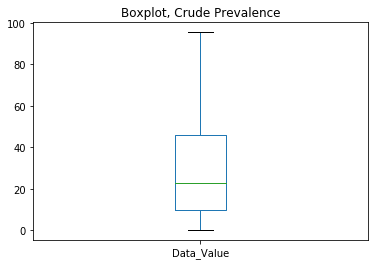

In [177]:
# Here is a boxplot of the Crude Prevalences, based on the dataset created above.
# This is for Crude Prevalences all smashed together

fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot, Crude Prevalence')
#pd.DataFrame(DF_CrdPrev_ft.Data_Value).boxplot(grid=False)
pd.DataFrame(DF_CrdPrev.Data_Value).boxplot(grid=False)

In [178]:
# Getting the AGE-ADJUSTED PREVALENCE for all observations that ARE NOT the US summary
#DF_AgeAdjPrev = data_500_cities[Col_Measure][(data_500_cities.DataValueTypeID == 'AgeAdjPrv') & (data_500_cities.StateAbbr != 'US')]
DF_AgeAdjPrev = DF_Prev[(DF_Prev.DataValueTypeID == 'AgeAdjPrv')]
DF_AgeAdjPrev
#DF_AgeAdjPrev_ft = pd.DataFrame(DF_AgeAdjPrev.to_records())
#DF_AgeAdjPrev_ft.head()

,CityName,StateAbbr,DataValueTypeID,Measure,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,CityFIPS,TractFIPS,PopulationCount,GeoLocation,UniqueID,Measure_Short
56,Birmingham,AL,AgeAdjPrv,Current lack of health insurance among adults ...,19.5,19.1,19.9,107000.0,NaN,212237,"(33.5275663773, -86.7988174678)",0107000,NoHlthIns
156,Birmingham,AL,AgeAdjPrv,Arthritis among adults aged >=18 Years,29.3,29.1,29.4,107000.0,NaN,212237,"(33.5275663773, -86.7988174678)",0107000,Arthritis
256,Birmingham,AL,AgeAdjPrv,Binge drinking among adults aged >=18 Years,13.0,13.0,13.1,107000.0,NaN,212237,"(33.5275663773, -86.7988174678)",0107000,BngDrnk
359,Birmingham,AL,AgeAdjPrv,High blood pressure among adults aged >=18 Years,44.1,43.9,44.2,107000.0,NaN,212237,"(33.5275663773, -86.7988174678)",0107000,HighBP
459,Birmingham,AL,AgeAdjPrv,Taking medicine for high blood pressure contro...,70.1,70.0,70.2,107000.0,NaN,212237,"(33.5275663773, -86.7988174678)",0107000,HtnMeds
560,Birmingham,AL,AgeAdjPrv,Cancer (excluding skin cancer) among adults ag...,5.7,5.6,5.7,107000.0,NaN,212237,"(33.5275663773, -86.7988174678)",0107000,Cancer
659,Birmingham,AL,AgeAdjPrv,Current asthma among adults aged >=18 Years,10.5,10.4,10.6,107000.0,NaN,212237,"(33.5275663773, -86.7988174678)",0107000,Asthma
760,Birmingham,AL,AgeAdjPrv,Coronary heart disease among adults aged >=18 ...,7.5,7.4,7.5,107000.0,NaN,212237,"(33.5275663773, -86.7988174678)",0107000,CHD
860,Birmingham,AL,AgeAdjPrv,Visits to doctor for routine checkup within th...,76.9,76.9,77.0,107000.0,NaN,212237,"(33.5275663773, -86.7988174678)",0107000,DocVisits
962,Birmingham,AL,AgeAdjPrv,Cholesterol screening among adults aged >=18 Y...,75.8,75.5,76.0,107000.0,NaN,212237,"(33.5275663773, -86.7988174678)",0107000,Cholesterol


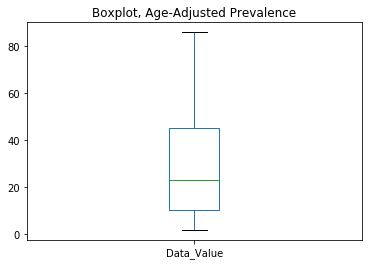

In [179]:
# BOXPLOT OF AGE-ADJUSTED PREVALENCE (which is adjusted based on all of the crude prevalences) - 
# This is for all causes smashed together
fig2, ax2 = plt.subplots()
ax2.set_title('Boxplot, Age-Adjusted Prevalence')
#pd.DataFrame(DF_AgeAdjPrev_ft.Data_Value).boxplot(grid=False)
pd.DataFrame(DF_AgeAdjPrev.Data_Value).boxplot(grid=False)

In [180]:
## Breaking up the CRUDE PREVALENCES dataset by each measure!

# Looking at the number of observations per Measure grouping

#measure_groups = DF_CrdPrev.groupby('Measure').groups
measure_groups = DF_CrdPrev.groupby('Measure_Short').groups
measure_groups

{'Arthritis': Int64Index([   157,    158,    159,    160,    161,    162,    163,    164,
                165,    166,
             ...
             809625, 809626, 809627, 809628, 809629, 809630, 809631, 809632,
             809633, 809634],
            dtype='int64', length=28504),
 'Asthma': Int64Index([   660,    661,    662,    663,    664,    665,    666,    667,
                668,    669,
             ...
             809715, 809716, 809717, 809718, 809719, 809720, 809721, 809722,
             809723, 809724],
            dtype='int64', length=28504),
 'BngDrnk': Int64Index([   257,    258,    259,    260,    261,    262,    263,    264,
                265,    266,
             ...
             809643, 809644, 809645, 809646, 809647, 809648, 809649, 809650,
             809651, 809652],
            dtype='int64', length=28504),
 'CHD': Int64Index([   761,    762,    763,    764,    765,    766,    767,    768,
                769,    770,
             ...
             809733,

In [181]:
# Getting keys of the dataset (so we can break the datasets up appropriately)
#gb = DF_CrdPrev.groupby('Measure')  
gb = DF_CrdPrev.groupby('Measure_Short')
gb.groups.keys()

dict_keys(['Arthritis', 'Asthma', 'BngDrnk', 'CHD', 'COPD', 'Cancer', 'Cholesterol', 'CurrSmoke', 'DentalVisits', 'Diabetes', 'DocVisits', 'FecBldTst', 'HighBP', 'HighChol', 'HtnMeds', 'KidneyDis', 'Mammo', 'MentHlth', 'NoHlthIns', 'NoPhysAct', 'Obesity', 'OlderMen', 'OlderWomen', 'PapSmear', 'PhysHlthBad', 'SleepLittle', 'Stroke', 'TeethLost'])

In [182]:
# If I was better at Python, I'd basically do a FOR loop for the above set of Dict Keys, 
# to basically run the set of commands that would break up each dataset, rename some columns and readd them
# to the entire dataset. 

# However, I've only given myself a day to write up this analysis, and I'm out of practice.

# I will revisit the FOR loop idea at a later date.

In [183]:
# I wanted to see the distributions of the variables. As there were 28 measures to compare across, 
# trying to make paneled histograms is one option. However, boxplots and other measures could be interesting too.

# I went into https://seaborn.pydata.org/tutorial/aesthetics.html to look for more.

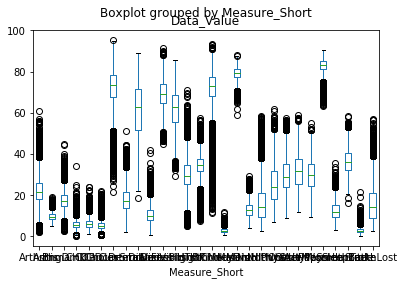

In [184]:
# Pandas boxplot
DF_CrdPrev.boxplot(by='Measure_Short', 
                       column=['Data_Value'], 
                       grid=False)

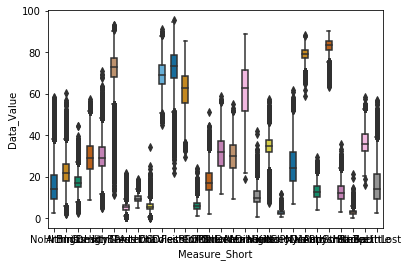

In [185]:
# Seaborn boxplot
sns.boxplot(y='Data_Value', x='Measure_Short', 
                 data=DF_CrdPrev, 
                 width=0.5,
                 palette="colorblind")

In [ ]:
# # Boxplots weren't helpful, and the axes did not leave much to be seen.
# # I decided to try to do a paneled histogram, to see if we could see approximate distributions.
# # I was still interested in comparisons, though...

# #link 1: https://realpython.com/python-histograms/
# #link 2: https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html

# #fig, axes = plt.subplots(nrows=2, ncols=2)
# #ax0, ax1, ax2, ax3 = axes.flatten()

# # Set up the plot
# #ax = plt.subplot(14, 2, Measure_i) #set it up to be a very long, very narrow plot
# # fig = plt.figure()
# # fig.subplots_adjust(hspace=0.4, wspace=0.4)
                    
# for Measure_i in range(1, 28):

# #     fig = plt.figure()
# #     fig.subplots_adjust(hspace=0.4, wspace=0.4)

#     # Subset to the Measure of interest
#     subset = DF_CrdPrev[DF_CrdPrev['Measure_Short'] == Measure_i]

#     fig, ax = plt.subplots(14, 2, sharex='col', sharey='row')

#     # Draw the plot
#     ax.hist(subset['Data_Value'], bins = 10,
#              color = 'blue', edgecolor = 'black', label = Measure_i)
    
#     # Title and labels
# #    ax.set_title('Histogram', size = 10)
#     ax.set_xlabel('Prevalence (per 100,000)', size = 10)
#     ax.set_ylabel('Flights', size= 10)

# #plt.tight_layout()
# plt.show()

In [186]:
#Looking at the list of keys - as we have 28 variables, we can't use all variables in one graphic.
list(gb.groups.keys()) 

# The list seems ideal to split into four seperate groupings!

['Arthritis',
 'Asthma',
 'BngDrnk',
 'CHD',
 'COPD',
 'Cancer',
 'Cholesterol',
 'CurrSmoke',
 'DentalVisits',
 'Diabetes',
 'DocVisits',
 'FecBldTst',
 'HighBP',
 'HighChol',
 'HtnMeds',
 'KidneyDis',
 'Mammo',
 'MentHlth',
 'NoHlthIns',
 'NoPhysAct',
 'Obesity',
 'OlderMen',
 'OlderWomen',
 'PapSmear',
 'PhysHlthBad',
 'SleepLittle',
 'Stroke',
 'TeethLost']

In [187]:
## Boxplots aren't helpful (surprise - there's 28 variables, with a lot of overlap!)
# So, I'm creating a density plot of all of our measures to see what the relative densities are.

# Remember: PREVALENCE is a measure of the population (new and current cases, per 100,000)
# Density here measures the number of CENSUS TRACTS that have a certain prevalence.

# idea taken from https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Density')

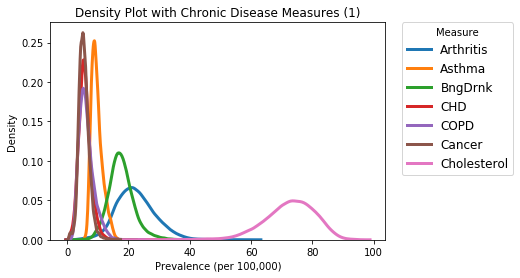

In [188]:
########################
# First section!
########################

# List of first 7 indicators to plot
Measures_Plot1 = ['Arthritis','Asthma','BngDrnk','CHD','COPD','Cancer','Cholesterol']

# Iterate through the indicators
for Measure_i in Measures_Plot1:
    # Subset to the Measure of interest
    subset = DF_CrdPrev[DF_CrdPrev['Measure_Short'] == Measure_i]
    
    # Draw the density plot
    sns.distplot(subset['Data_Value'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = Measure_i)
    
# Plot formatting
plt.legend(prop={'size': 12}, title = 'Measure',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Density Plot with Chronic Disease Measures (1)')
plt.xlabel('Prevalence (per 100,000)')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

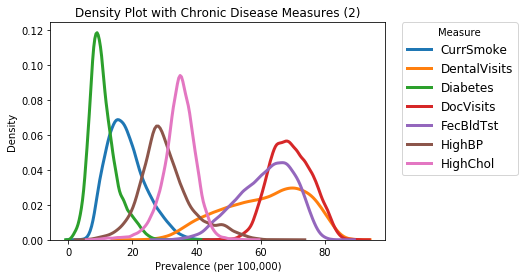

In [189]:
########################
# Second section!
########################

# List of second 7 indicators to plot
Measures_Plot2 = ['CurrSmoke','DentalVisits','Diabetes','DocVisits','FecBldTst','HighBP','HighChol']

# Iterate through the indicators
for Measure_i in Measures_Plot2:
    # Subset to the Measure of interest
    subset = DF_CrdPrev[DF_CrdPrev['Measure_Short'] == Measure_i]
    
    # Draw the density plot
    sns.distplot(subset['Data_Value'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = Measure_i)
    
# Plot formatting
plt.legend(prop={'size': 12}, title = 'Measure',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Density Plot with Chronic Disease Measures (2)')
plt.xlabel('Prevalence (per 100,000)')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

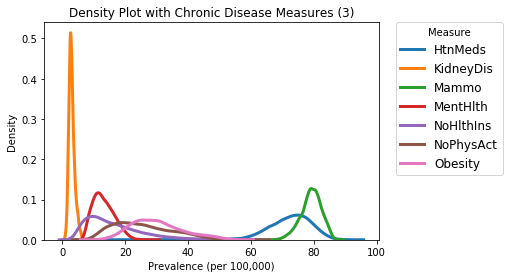

In [190]:
########################
# Third section!
########################

# List of third 7 indicators to plot
Measures_Plot3 = ['HtnMeds','KidneyDis','Mammo','MentHlth','NoHlthIns','NoPhysAct','Obesity']

# Iterate through the indicators
for Measure_i in Measures_Plot3:
    # Subset to the Measure of interest
    subset = DF_CrdPrev[DF_CrdPrev['Measure_Short'] == Measure_i]
    
    # Draw the density plot
    sns.distplot(subset['Data_Value'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = Measure_i)
    
# Plot formatting
plt.legend(prop={'size': 12}, title = 'Measure',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Density Plot with Chronic Disease Measures (3)')
plt.xlabel('Prevalence (per 100,000)')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

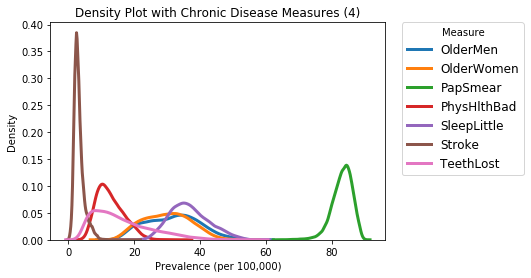

In [191]:
########################
# Fourth section!
########################

# List of last 7 indicators to plot
Measures_Plot4 = ['OlderMen','OlderWomen','PapSmear','PhysHlthBad','SleepLittle','Stroke','TeethLost']

# Iterate through the indicators
for Measure_i in Measures_Plot4:
    # Subset to the Measure of interest
    subset = DF_CrdPrev[DF_CrdPrev['Measure_Short'] == Measure_i]
    
    # Draw the density plot
    sns.distplot(subset['Data_Value'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = Measure_i)
    
# Plot formatting
plt.legend(prop={'size': 12}, title = 'Measure',bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Density Plot with Chronic Disease Measures (4)')
plt.xlabel('Prevalence (per 100,000)')
plt.ylabel('Density')


In [192]:
# WHAT DOES THE ABOVE ANALYSIS TELL US?

# Basically - a lot of census tracts are reporting a low prevalence of many chronic conditions, 
# such as CHD, stroke, and diabetes (phew) (i.e., high density at a very low prevalence)

# Obviously, the indicators with much higher prevalences are those that affect larger swathes of the population
# such as mammograms and Pap smears (for women), dental visits and doctor's visits (ideally for the entire population).

# However, there were some outcomes I was intrigued in - sleeping little, Pap smears, hypertension meds, and cholesterol
# that I want to map out - because the density plot can't tell us much. We know there are spatial relationships
# to some of these indicators - especially here in the south, where there's worse health outcomes overall.

In [193]:
# My interests, for a long time, have been in spatial epidemiology - the effects of place upon health outcomes.

# This dataset, as part of the 500 Cities project, would play well with this interest.

# So, I decided to reshape my dataset, so each indicator's census tract was a distinct row
# and each measure had its own column. I figured this would play better with the mapping capabilities
# found in Geopandas, Pandas, and MatPlotLib

# Link:
# https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d

In [194]:
#################################################################################
# Below is my code to reshape a dataset so I had more control over the columns - 
# say, if I was creating a dataset for analysis.
###################################################################################

In [195]:
#Now that we know the keys, we need to split up the dataset into seperate instances so we can 
# parse out the same variables and have more control over the reshaped dataset.
# I know that there's a shape function in Pandas!

# Arthritis will have the identifying information attached to it.

# Note - I'd originally also created a unique PopCount variable for each indicator, not realizing
# that PopCount was actually the entire population of the tract. 
# So I'm removing it from my mini-datasets before concatenation.

Arthritis = gb.get_group('Arthritis')
Arthritis.drop(columns=['Measure']) #Measure used to be specific to each measure - we're outputting data, so not necessary
Arthritis.head()

,CityName,StateAbbr,DataValueTypeID,Measure,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,CityFIPS,TractFIPS,PopulationCount,GeoLocation,UniqueID,Measure_Short
157,Birmingham,AL,CrdPrv,Arthritis among adults aged >=18 Years,29.3,29.1,29.4,107000.0,NaN,212237,"(33.5275663773, -86.7988174678)",0107000,Arthritis
158,Birmingham,AL,CrdPrv,Arthritis among adults aged >=18 Years,31.3,30.3,32.5,107000.0,1.073000e+09,3042,"(33.5794328326, -86.7228323926)",0107000-01073000100,Arthritis
159,Birmingham,AL,CrdPrv,Arthritis among adults aged >=18 Years,30.2,29.0,31.4,107000.0,1.073000e+09,2735,"(33.5428208686, -86.752433978)",0107000-01073000300,Arthritis
160,Birmingham,AL,CrdPrv,Arthritis among adults aged >=18 Years,31.7,30.3,33.0,107000.0,1.073000e+09,3338,"(33.5632449633, -86.7640474064)",0107000-01073000400,Arthritis
161,Birmingham,AL,CrdPrv,Arthritis among adults aged >=18 Years,35.6,34.1,37.0,107000.0,1.073000e+09,2864,"(33.5442404594, -86.7749130719)",0107000-01073000500,Arthritis


In [196]:
# Changing the index variable and starting to rename variables.
Arthritis_index = Arthritis.set_index('UniqueID')
Arthritis_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.Arthritis').replace('High_Confidence_Limit','High_CL.Arthritis').replace('Data_Value','Data_Value.Arthritis').replace('PopulationCount','PopCount') \
                           for hdr in Arthritis_index.columns]
Arthritis_index.head()
Arthritis = Arthritis_index

#del Arthritis_index

#check to make sure I removed this correctly
Arthritis
Arthritis_index

,CityName,StateAbbr,DataValueTypeID,Measure,Data_Value.Arthritis,Low_CL.Arthritis,High_CL.Arthritis,CityFIPS,TractFIPS,PopCount,GeoLocation,Measure_Short
UniqueID,,,,,,,,,,,,
0107000,Birmingham,AL,CrdPrv,Arthritis among adults aged >=18 Years,29.3,29.1,29.4,107000.0,NaN,212237,"(33.5275663773, -86.7988174678)",Arthritis
0107000-01073000100,Birmingham,AL,CrdPrv,Arthritis among adults aged >=18 Years,31.3,30.3,32.5,107000.0,1.073000e+09,3042,"(33.5794328326, -86.7228323926)",Arthritis
0107000-01073000300,Birmingham,AL,CrdPrv,Arthritis among adults aged >=18 Years,30.2,29.0,31.4,107000.0,1.073000e+09,2735,"(33.5428208686, -86.752433978)",Arthritis
0107000-01073000400,Birmingham,AL,CrdPrv,Arthritis among adults aged >=18 Years,31.7,30.3,33.0,107000.0,1.073000e+09,3338,"(33.5632449633, -86.7640474064)",Arthritis
0107000-01073000500,Birmingham,AL,CrdPrv,Arthritis among adults aged >=18 Years,35.6,34.1,37.0,107000.0,1.073000e+09,2864,"(33.5442404594, -86.7749130719)",Arthritis
0107000-01073000700,Birmingham,AL,CrdPrv,Arthritis among adults aged >=18 Years,37.2,35.8,38.6,107000.0,1.073001e+09,2577,"(33.5525406139, -86.8016893706)",Arthritis
0107000-01073000800,Birmingham,AL,CrdPrv,Arthritis among adults aged >=18 Years,36.5,35.0,38.0,107000.0,1.073001e+09,3859,"(33.549697789, -86.8330944744)",Arthritis
0107000-01073001100,Birmingham,AL,CrdPrv,Arthritis among adults aged >=18 Years,32.0,30.4,33.7,107000.0,1.073001e+09,5354,"(33.5429143325, -86.8756782852)",Arthritis
0107000-01073001200,Birmingham,AL,CrdPrv,Arthritis among adults aged >=18 Years,33.5,32.4,34.6,107000.0,1.073001e+09,2876,"(33.5278767706, -86.8604161686)",Arthritis


In [197]:
## All other indicators will only have Unique Identifiers and the CLs and Data Values Attached to Them

Col_Grps = ['Low_Confidence_Limit','High_Confidence_Limit','Data_Value','UniqueID'] 
print(Col_Grps)

#'Asthma', 'BngDrnk', 'CHD', 'COPD', 'Cancer', 'Cholesterol', 'CurrSmoke', 'DentalVisits', 'Diabetes', 'DocVisits', 'FecBldTst', 'HighBP', 'HighChol', 'HtnMeds', 'KidneyDis', 'Mammo', 'MentHlth', 'NoHlthIns', 'NoPhysAct', 'Obesity', 'OlderMen', 'OlderWomen', 'PapSmear', 'PhysHlthBad', 'SleepLittle', 'Stroke', 'TeethLost']

['Low_Confidence_Limit', 'High_Confidence_Limit', 'Data_Value', 'UniqueID']


In [198]:
#Asthma
Asthma = gb.get_group('Asthma')[Col_Grps]
Asthma.head()
Asthma_index = Asthma.set_index('UniqueID')
Asthma_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.Asthma').replace('High_Confidence_Limit','High_CL.Asthma').replace('Data_Value','Data_Value.Asthma') \
                           for hdr in Asthma_index.columns]
Asthma_index.head()
#Asthma = Asthma_index

,Low_CL.Asthma,High_CL.Asthma,Data_Value.Asthma
UniqueID,,,
0107000,10.4,10.6,10.5
0107000-01073000100,11.1,12.7,11.8
0107000-01073000300,10.2,11.8,11.0
0107000-01073000400,10.8,13.0,11.8
0107000-01073000500,11.2,13.2,12.1


In [199]:
#Binge Drinking
BngDrnk = gb.get_group('BngDrnk')[Col_Grps]
#BngDrnk.head()
BngDrnk_index = BngDrnk.set_index('UniqueID')
BngDrnk_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.BngDrnk').replace('High_Confidence_Limit','High_CL.BngDrnk').replace('Data_Value','Data_Value.BngDrnk') \
                           for hdr in BngDrnk_index.columns]
BngDrnk_index.head()
#BngDrnk = BngDrnk_index

,Low_CL.BngDrnk,High_CL.BngDrnk,Data_Value.BngDrnk
UniqueID,,,
0107000,13.1,13.2,13.2
0107000-01073000100,11.1,12.0,11.5
0107000-01073000300,11.5,12.5,12.0
0107000-01073000400,11.0,12.2,11.6
0107000-01073000500,9.4,10.5,10.0


In [200]:
#CHD
CHD = gb.get_group('CHD')[Col_Grps]
#CHD.head()
CHD_index = CHD.set_index('UniqueID')
CHD_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.CHD').replace('High_Confidence_Limit','High_CL.CHD').replace('Data_Value','Data_Value.CHD') \
                           for hdr in CHD_index.columns]
CHD_index.head()
#CHD = CHD_index

,Low_CL.CHD,High_CL.CHD,Data_Value.CHD
UniqueID,,,
0107000,7.4,7.6,7.5
0107000-01073000100,7.6,8.6,8.1
0107000-01073000300,7.7,9.0,8.3
0107000-01073000400,7.4,8.7,8.0
0107000-01073000500,9.3,11.1,10.1


In [201]:
#COPD
COPD = gb.get_group('COPD')[Col_Grps]
#COPD.head()
COPD_index = COPD.set_index('UniqueID')
COPD_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.COPD').replace('High_Confidence_Limit','High_CL.COPD').replace('Data_Value','Data_Value.COPD') \
                           for hdr in COPD_index.columns]
COPD_index.head()
#COPD = COPD_index

,Low_CL.COPD,High_CL.COPD,Data_Value.COPD
UniqueID,,,
0107000,8.7,8.9,8.8
0107000-01073000100,9.9,12.1,10.9
0107000-01073000300,9.6,12.1,10.8
0107000-01073000400,9.2,11.8,10.3
0107000-01073000500,10.7,13.8,12.2


In [202]:
#Cancer
Cancer = gb.get_group('Cancer')[Col_Grps]
#Cancer.head()
Cancer_index = Cancer.set_index('UniqueID')
Cancer_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.Cancer').replace('High_Confidence_Limit','High_CL.Cancer').replace('Data_Value','Data_Value.Cancer') \
                           for hdr in Cancer_index.columns]
Cancer_index.head()
#Cancer = Cancer_index

,Low_CL.Cancer,High_CL.Cancer,Data_Value.Cancer
UniqueID,,,
0107000-01073000800,6.2,6.9,6.5
0107000,5.6,5.7,5.6
0107000-01073000100,5.0,5.3,5.2
0107000-01073000300,4.4,4.8,4.6
0107000-01073000400,5.0,5.5,5.2


In [203]:
#Cholesterol
Cholesterol = gb.get_group('Cholesterol')[Col_Grps]
#Cholesterol.head()
Cholesterol_index = Cholesterol.set_index('UniqueID')
Cholesterol_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.Cholesterol').replace('High_Confidence_Limit','High_CL.Cholesterol').replace('Data_Value','Data_Value.Cholesterol') \
                           for hdr in Cholesterol_index.columns]
Cholesterol_index.head()
#Cholesterol = Cholesterol_index

,Low_CL.Cholesterol,High_CL.Cholesterol,Data_Value.Cholesterol
UniqueID,,,
0107000-01073002305,78.0,81.5,79.8
0107000,74.5,75.0,74.8
0107000-01073000100,70.3,74.2,72.3
0107000-01073000300,67.7,71.9,69.8
0107000-01073000400,69.6,74.2,72.0


In [204]:
#Current Smoking
CurrSmoke = gb.get_group('CurrSmoke')[Col_Grps]
#CurrSmoke.head()
CurrSmoke_index = CurrSmoke.set_index('UniqueID')
CurrSmoke_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.CurrSmoke').replace('High_Confidence_Limit','High_CL.CurrSmoke').replace('Data_Value','Data_Value.CurrSmoke') \
                           for hdr in CurrSmoke_index.columns]
CurrSmoke_index.head()
#CurrSmoke = CurrSmoke_index

,Low_CL.CurrSmoke,High_CL.CurrSmoke,Data_Value.CurrSmoke
UniqueID,,,
0107000-01073000500,24.6,31.1,27.9
0107000-01073000700,28.1,35.2,31.6
0107000-01073000800,21.6,27.6,24.6
0107000,21.9,22.6,22.3
0107000-01073000100,25.7,31.4,28.5


In [205]:
#Dental Visits
DentalVisits = gb.get_group('DentalVisits')[Col_Grps]
#DentalVisits.head()
DentalVisits_index = DentalVisits.set_index('UniqueID')
DentalVisits_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.DentalVisits').replace('High_Confidence_Limit','High_CL.DentalVisits').replace('Data_Value','Data_Value.DentalVisits') \
                           for hdr in DentalVisits_index.columns]
DentalVisits_index.head()
#DentalVisits = DentalVisits_index

,Low_CL.DentalVisits,High_CL.DentalVisits,Data_Value.DentalVisits
UniqueID,,,
0107000,52.1,53.1,52.6
0107000-01073000100,39.4,46.0,42.8
0107000-01073000300,36.3,43.5,39.7
0107000-01073000400,40.0,48.0,44.1
0107000-01073000500,35.3,43.8,39.4


In [206]:
#Diabetes
Diabetes = gb.get_group('Diabetes')[Col_Grps]
#Diabetes.head()
Diabetes_index = Diabetes.set_index('UniqueID')
Diabetes_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.Diabetes').replace('High_Confidence_Limit','High_CL.Diabetes').replace('Data_Value','Data_Value.Diabetes') \
                           for hdr in Diabetes_index.columns]
Diabetes_index.head()
#Diabetes = Diabetes_index

,Low_CL.Diabetes,High_CL.Diabetes,Data_Value.Diabetes
UniqueID,,,
0107000,16.6,16.8,16.7
0107000-01073000100,17.4,19.2,18.3
0107000-01073000300,18.5,20.8,19.7
0107000-01073000400,18.4,20.8,19.6
0107000-01073000500,22.5,25.3,23.9


In [207]:
# Doctor's Visits
DocVisits = gb.get_group('DocVisits')[Col_Grps]
#DocVisits.head()
DocVisits_index = DocVisits.set_index('UniqueID')
DocVisits_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.DocVisits').replace('High_Confidence_Limit','High_CL.DocVisits').replace('Data_Value','Data_Value.DocVisits') \
                           for hdr in DocVisits_index.columns]
DocVisits_index.head()
#DocVisits = DocVisits_index

,Low_CL.DocVisits,High_CL.DocVisits,Data_Value.DocVisits
UniqueID,,,
0107000,76.8,77.0,76.9
0107000-01073000100,75.8,77.4,76.6
0107000-01073000300,73.0,74.7,73.9
0107000-01073000400,77.1,79.0,78.1
0107000-01073000500,78.6,80.4,79.5


In [208]:
#Fecal Blood Tests
FecBldTst = gb.get_group('FecBldTst')[Col_Grps]
#FecBldTst.head()
FecBldTst_index = FecBldTst.set_index('UniqueID')
FecBldTst_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.FecBldTst').replace('High_Confidence_Limit','High_CL.FecBldTst').replace('Data_Value','Data_Value.FecBldTst') \
                           for hdr in FecBldTst_index.columns]
FecBldTst_index.head()
#FecBldTst = FecBldTst_index

,Low_CL.FecBldTst,High_CL.FecBldTst,Data_Value.FecBldTst
UniqueID,,,
0107000,63.6,64.5,64.1
0107000-01073000100,53.5,59.9,56.8
0107000-01073000300,49.7,57.8,53.8
0107000-01073000400,55.2,63.9,59.7
0107000-01073000500,53.4,62.0,57.9


In [209]:
# High Blood Pressures
HighBP = gb.get_group('HighBP')[Col_Grps]
#HighBP.head()
HighBP_index = HighBP.set_index('UniqueID')
HighBP_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.HighBP').replace('High_Confidence_Limit','High_CL.HighBP').replace('Data_Value','Data_Value.HighBP') \
                           for hdr in HighBP_index.columns]
HighBP_index.head()
#HighBP = HighBP_index

,Low_CL.HighBP,High_CL.HighBP,Data_Value.HighBP
UniqueID,,,
0107000,43.7,43.9,43.8
0107000-01073000100,45.1,47.3,46.2
0107000-01073000300,44.4,46.8,45.6
0107000-01073000400,48.7,51.3,50.1
0107000-01073000500,53.0,55.6,54.3


In [210]:
# High Cholesterol
HighChol = gb.get_group('HighChol')[Col_Grps]
#HighChol.head()
HighChol_index = HighChol.set_index('UniqueID')
HighChol_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.HighChol').replace('High_Confidence_Limit','High_CL.HighChol').replace('Data_Value','Data_Value.HighChol') \
                           for hdr in HighChol_index.columns]
HighChol_index.head()
#HighChol = HighChol_index

,Low_CL.HighChol,High_CL.HighChol,Data_Value.HighChol
UniqueID,,,
0107000,39.1,39.4,39.2
0107000-01073000100,39.2,41.5,40.4
0107000-01073000300,40.2,42.7,41.5
0107000-01073000400,40.8,43.7,42.3
0107000-01073000500,43.4,46.6,45.0


In [211]:
#Hypertension Medication
HtnMeds = gb.get_group('HtnMeds')[Col_Grps]
#HtnMeds.head()
HtnMeds_index = HtnMeds.set_index('UniqueID')
HtnMeds_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.HtnMeds').replace('High_Confidence_Limit','High_CL.HtnMeds').replace('Data_Value','Data_Value.HtnMeds') \
                           for hdr in HtnMeds_index.columns]
HtnMeds_index.head()
#HtnMeds = HtnMeds_index

,Low_CL.HtnMeds,High_CL.HtnMeds,Data_Value.HtnMeds
UniqueID,,,
0107000,81.2,81.4,81.3
0107000-01073000100,79.1,80.8,80.0
0107000-01073000300,79.3,81.1,80.3
0107000-01073000400,81.0,83.0,82.0
0107000-01073000500,83.1,84.9,84.0


In [212]:
#Kidney Disease
KidneyDis = gb.get_group('KidneyDis')[Col_Grps]
#KidneyDis.head()
KidneyDis_index = KidneyDis.set_index('UniqueID')
KidneyDis_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.KidneyDis').replace('High_Confidence_Limit','High_CL.KidneyDis').replace('Data_Value','Data_Value.KidneyDis') \
                           for hdr in KidneyDis_index.columns]
KidneyDis_index.head()
#KidneyDis = KidneyDis_index

,Low_CL.KidneyDis,High_CL.KidneyDis,Data_Value.KidneyDis
UniqueID,,,
0107000,3.8,3.9,3.8
0107000-01073000100,4.0,4.4,4.2
0107000-01073000300,4.1,4.6,4.3
0107000-01073000400,3.9,4.5,4.2
0107000-01073000500,4.9,5.6,5.2


In [213]:
#Mammograms
Mammo = gb.get_group('Mammo')[Col_Grps]
#Mammo.head()
Mammo_index = Mammo.set_index('UniqueID')
Mammo_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.Mammo').replace('High_Confidence_Limit','High_CL.Mammo').replace('Data_Value','Data_Value.Mammo') \
                           for hdr in Mammo_index.columns]
Mammo_index.head()
#Mammo = Mammo_index

,Low_CL.Mammo,High_CL.Mammo,Data_Value.Mammo
UniqueID,,,
0107000,83.2,83.9,83.6
0107000-01073000100,80.2,84.7,82.8
0107000-01073000300,80.4,85.7,83.2
0107000-01073000400,80.6,85.9,83.5
0107000-01073000500,81.1,86.3,83.8


In [214]:
#Mental Health
MentHlth = gb.get_group('MentHlth')[Col_Grps]
#MentHlth.head()
MentHlth_index = MentHlth.set_index('UniqueID')
MentHlth_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.MentHlth').replace('High_Confidence_Limit','High_CL.MentHlth').replace('Data_Value','Data_Value.MentHlth') \
                           for hdr in MentHlth_index.columns]
MentHlth_index.head()
#MentHlth = MentHlth_index

,Low_CL.MentHlth,High_CL.MentHlth,Data_Value.MentHlth
UniqueID,,,
0107000,15.1,15.4,15.2
0107000-01073000100,17.3,20.2,18.6
0107000-01073000300,17.0,20.0,18.4
0107000-01073000400,16.0,19.5,17.5
0107000-01073000500,16.4,20.0,18.2


In [215]:
#No Health Insurance
NoHlthIns = gb.get_group('NoHlthIns')[Col_Grps]
#NoHlthIns.head()
NoHlthIns_index = NoHlthIns.set_index('UniqueID')
NoHlthIns_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.NoHlthIns').replace('High_Confidence_Limit','High_CL.NoHlthIns').replace('Data_Value','Data_Value.NoHlthIns') \
                           for hdr in NoHlthIns_index.columns]
NoHlthIns_index.head()
#NoHlthIns = NoHlthIns_index

,Low_CL.NoHlthIns,High_CL.NoHlthIns,Data_Value.NoHlthIns
UniqueID,,,
0107000,18.8,19.5,19.2
0107000-01073000100,20.6,26.3,23.3
0107000-01073000300,25.2,31.7,28.5
0107000-01073000400,20.5,27.6,23.9
0107000-01073000500,22.0,29.9,25.8


In [216]:
# No Physical Activity
NoPhysAct = gb.get_group('NoPhysAct')[Col_Grps]
#NoPhysAct.head()
NoPhysAct_index = NoPhysAct.set_index('UniqueID')
NoPhysAct_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.NoPhysAct').replace('High_Confidence_Limit','High_CL.NoPhysAct').replace('Data_Value','Data_Value.NoPhysAct') \
                           for hdr in NoPhysAct_index.columns]
NoPhysAct_index.head()
#NoPhysAct = NoPhysAct_index

,Low_CL.NoPhysAct,High_CL.NoPhysAct,Data_Value.NoPhysAct
UniqueID,,,
0107000,35.2,36.0,35.6
0107000-01073000100,39.4,45.2,42.3
0107000-01073000300,41.4,47.7,44.6
0107000-01073000400,39.1,45.7,42.4
0107000-01073000500,42.8,49.9,46.5


In [217]:
# Obesity
Obesity = gb.get_group('Obesity')[Col_Grps]
#Obesity.head()
Obesity_index = Obesity.set_index('UniqueID')
Obesity_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.Obesity').replace('High_Confidence_Limit','High_CL.Obesity').replace('Data_Value','Data_Value.Obesity') \
                           for hdr in Obesity_index.columns]
Obesity_index.head()
#Obesity = Obesity_index

,Low_CL.Obesity,High_CL.Obesity,Data_Value.Obesity
UniqueID,,,
0107000-01073002306,27.3,29.4,28.4
0107000-01073002400,44.1,46.6,45.4
0107000-01073002700,41.4,44.6,43.0
0107000-01073002900,49.1,52.0,50.7
0107000-01073003001,34.2,36.5,35.4


In [218]:
# Tests for Older Men
OlderMen = gb.get_group('OlderMen')[Col_Grps]
#OlderMen.head()
OlderMen_index = OlderMen.set_index('UniqueID')
OlderMen_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.OlderMen').replace('High_Confidence_Limit','High_CL.OlderMen').replace('Data_Value','Data_Value.OlderMen') \
                           for hdr in OlderMen_index.columns]
OlderMen_index.head()
#OlderMen = OlderMen_index

,Low_CL.OlderMen,High_CL.OlderMen,Data_Value.OlderMen
UniqueID,,,
0107000,32.2,33.7,32.9
0107000-01073000100,25.5,34.3,29.7
0107000-01073000300,22.2,31.0,26.4
0107000-01073000400,23.3,33.4,28.0
0107000-01073000500,18.9,30.5,24.4


In [219]:
# Tests for Older Women
OlderWomen = gb.get_group('OlderWomen')[Col_Grps]
#OlderWomen.head()
OlderWomen_index = OlderWomen.set_index('UniqueID')
OlderWomen_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.OlderWomen').replace('High_Confidence_Limit','High_CL.OlderWomen').replace('Data_Value','Data_Value.OlderWomen') \
                           for hdr in OlderWomen_index.columns]
OlderWomen_index.head()
#OlderWomen = OlderWomen_index

,Low_CL.OlderWomen,High_CL.OlderWomen,Data_Value.OlderWomen
UniqueID,,,
0107000,25.4,26.6,26.0
0107000-01073000100,20.4,26.1,23.2
0107000-01073000300,17.7,25.0,20.9
0107000-01073000400,19.6,27.0,23.2
0107000-01073000500,16.0,23.8,19.8


In [220]:
# Pap Smears
PapSmear = gb.get_group('PapSmear')[Col_Grps]
#PapSmear.head()
PapSmear_index = PapSmear.set_index('UniqueID')
PapSmear_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.PapSmear').replace('High_Confidence_Limit','High_CL.PapSmear').replace('Data_Value','Data_Value.PapSmear') \
                           for hdr in PapSmear_index.columns]
PapSmear_index.head()
#PapSmear = PapSmear_index

,Low_CL.PapSmear,High_CL.PapSmear,Data_Value.PapSmear
UniqueID,,,
0107000,84.8,85.3,85.0
0107000-01073000100,83.4,86.6,85.0
0107000-01073000300,81.9,85.6,83.8
0107000-01073000400,82.3,86.8,84.6
0107000-01073000500,82.1,86.5,84.3


In [221]:
# Physical Health is Bad
PhysHlthBad = gb.get_group('PhysHlthBad')[Col_Grps]
#PhysHlthBad.head()
PhysHlthBad_index = PhysHlthBad.set_index('UniqueID')
PhysHlthBad_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.PhysHlthBad').replace('High_Confidence_Limit','High_CL.PhysHlthBad').replace('Data_Value','Data_Value.PhysHlthBad') \
                           for hdr in PhysHlthBad_index.columns]
PhysHlthBad_index.head()
#PhysHlthBad = PhysHlthBad_index

,Low_CL.PhysHlthBad,High_CL.PhysHlthBad,Data_Value.PhysHlthBad
UniqueID,,,
0107000,16.1,16.5,16.3
0107000-01073000100,18.5,21.7,20.0
0107000-01073000300,18.8,22.5,20.6
0107000-01073000400,17.6,21.4,19.3
0107000-01073000500,19.8,24.0,21.8


In [222]:
# Sleep litle (less than 7 hrs, day)
SleepLittle = gb.get_group('SleepLittle')[Col_Grps]
#SleepLittle.head()
SleepLittle_index = SleepLittle.set_index('UniqueID')
SleepLittle_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.SleepLittle').replace('High_Confidence_Limit','High_CL.SleepLittle').replace('Data_Value','Data_Value.SleepLittle') \
                           for hdr in SleepLittle_index.columns]
SleepLittle_index.head()
#SleepLittle = SleepLittle_index

,Low_CL.SleepLittle,High_CL.SleepLittle,Data_Value.SleepLittle
UniqueID,,,
0107000,41.3,41.6,41.5
0107000-01073000100,44.3,46.5,45.5
0107000-01073000300,43.2,45.7,44.5
0107000-01073000400,44.2,47.0,45.7
0107000-01073000500,44.5,47.4,46.1


In [223]:
# Stroke
Stroke = gb.get_group('Stroke')[Col_Grps]
#Stroke.head()
Stroke_index = Stroke.set_index('UniqueID')
Stroke_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.Stroke').replace('High_Confidence_Limit','High_CL.Stroke').replace('Data_Value','Data_Value.Stroke') \
                           for hdr in Stroke_index.columns]
Stroke_index.head()
#Stroke = Stroke_index

,Low_CL.Stroke,High_CL.Stroke,Data_Value.Stroke
UniqueID,,,
0107000,4.9,5.1,5.0
0107000-01073000100,5.1,6.1,5.6
0107000-01073000300,5.3,6.5,5.9
0107000-01073000400,5.1,6.4,5.7
0107000-01073000500,6.9,8.6,7.7


In [224]:
# Population with Missing Teeth
TeethLost = gb.get_group('TeethLost')[Col_Grps]
#TeethLost.head()
TeethLost_index = TeethLost.set_index('UniqueID')
TeethLost_index.columns = [hdr.replace('Low_Confidence_Limit','Low_CL.TeethLost').replace('High_Confidence_Limit','High_CL.TeethLost').replace('Data_Value','Data_Value.TeethLost') \
                           for hdr in TeethLost_index.columns]
TeethLost_index.head()
#TeethLost = TeethLost_index

,Low_CL.TeethLost,High_CL.TeethLost,Data_Value.TeethLost
UniqueID,,,
0107000,21.8,23.9,22.8
0107000-01073000100,23.7,35.1,28.9
0107000-01073000300,25.5,40.2,32.9
0107000-01073000400,22.0,35.1,28.6
0107000-01073000500,24.4,42.9,34.0


In [225]:
## https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d

In [226]:
## Time to merge all of the datasets together into one big dataset (but I know it's going to be a lot of intermediates!)
# There might be an easier way of doing this in Python, but I'm out of practice enough not to think about it.
# Also, really jetlagged. :D

#'Arthritis_index', 'Asthma_index', 'BngDrnk_index', 'CHD_index', 'COPD_index', 'Cancer_index', 'Cholesterol_index', 'CurrSmoke_index', 'DentalVisits_index', 'Diabetes_index', 'DocVisits_index', 'FecBldTst_index', 'HighBP_index', 'HighChol_index', 'HtnMeds_index', 'KidneyDis_index', 'Mammo_index', 'MentHlth_index', 'NoHlthIns_index', 'NoPhysAct_index', 'Obesity_index', 'OlderMen_index', 'OlderWomen_index', 'PapSmear_index', 'PhysHlthBad_index', 'SleepLittle_index', 'Stroke_index', 'TeethLost_index' 

int_table1 = pd.merge(Arthritis_index, Asthma_index, on='UniqueID', how='outer')
#int_table1

int_table2 = pd.merge(int_table1, BngDrnk_index, on='UniqueID', how='outer')
#int_table2

del int_table1 #deleting previous intermediary as I go to save memory

int_table3 = pd.merge(int_table2, CHD_index, on='UniqueID', how='outer')
#int_table3

del int_table2 #deleting previous intermediary as I go to save memory

int_table4 = pd.merge(int_table3, COPD_index, on='UniqueID', how='outer')
#int_table4

del int_table3 #deleting previous intermediary as I go to save memory

int_table5 = pd.merge(int_table4, Cancer_index, on='UniqueID', how='outer')
#int_table5

del int_table4 #deleting previous intermediary as I go to save memory

int_table6 = pd.merge(int_table5, Cholesterol_index, on='UniqueID', how='outer')
#int_table6

del int_table5 #deleting previous intermediary as I go to save memory

int_table7 = pd.merge(int_table6, CurrSmoke_index, on='UniqueID', how='outer')
#int_table7

del int_table6 #deleting previous intermediary as I go to save memory

int_table8 = pd.merge(int_table7, DentalVisits_index, on='UniqueID', how='outer')
#int_table8

del int_table7 #deleting previous intermediary as I go to save memory

int_table9 = pd.merge(int_table8, Diabetes_index, on='UniqueID', how='outer')
#int_table9

del int_table8 #deleting previous intermediary as I go to save memory

int_table10 = pd.merge(int_table9, DocVisits_index, on='UniqueID', how='outer')
#int_table10

del int_table9 #deleting previous intermediary as I go to save memory

int_table11 = pd.merge(int_table10, FecBldTst_index, on='UniqueID', how='outer')
#int_table11

del int_table10 #deleting previous intermediary as I go to save memory

int_table12 = pd.merge(int_table11, HighBP_index, on='UniqueID', how='outer')
#int_table12

del int_table11 #deleting previous intermediary as I go to save memory

int_table13 = pd.merge(int_table12, HighChol_index, on='UniqueID', how='outer')
#int_table13

del int_table12 #deleting previous intermediary as I go to save memory

int_table14 = pd.merge(int_table13, HtnMeds_index, on='UniqueID', how='outer')
#int_table14

del int_table13 #deleting previous intermediary as I go to save memory

int_table15 = pd.merge(int_table14, KidneyDis_index, on='UniqueID', how='outer')
#int_table15

del int_table14 #deleting previous intermediary as I go to save memory

int_table16 = pd.merge(int_table15, Mammo_index, on='UniqueID', how='outer')
#int_table16

del int_table15 #deleting previous intermediary as I go to save memory

int_table17 = pd.merge(int_table16, MentHlth_index, on='UniqueID', how='outer')
#int_table17

del int_table16 #deleting previous intermediary as I go to save memory

int_table18 = pd.merge(int_table17, NoHlthIns_index, on='UniqueID', how='outer')
#int_table18

del int_table17 #deleting previous intermediary as I go to save memory

int_table19 = pd.merge(int_table18, NoPhysAct_index, on='UniqueID', how='outer')
#int_table19

del int_table18 #deleting previous intermediary as I go to save memory

int_table20 = pd.merge(int_table19, Obesity_index, on='UniqueID', how='outer')
#int_table20

del int_table19 #deleting previous intermediary as I go to save memory

int_table21 = pd.merge(int_table20, OlderMen_index, on='UniqueID', how='outer')
#int_table21

del int_table20 #deleting previous intermediary as I go to save memory

int_table22 = pd.merge(int_table21, OlderWomen_index, on='UniqueID', how='outer')
#int_table22

del int_table21 #deleting previous intermediary as I go to save memory

int_table23 = pd.merge(int_table22, PapSmear_index, on='UniqueID', how='outer')
#int_table23

del int_table22 #deleting previous intermediary as I go to save memory

int_table24 = pd.merge(int_table23, PhysHlthBad_index, on='UniqueID', how='outer')
#int_table24

del int_table23 #deleting previous intermediary as I go to save memory

int_table25 = pd.merge(int_table24, SleepLittle_index, on='UniqueID', how='outer')
#int_table25

del int_table24 #deleting previous intermediary as I go to save memory

int_table26 = pd.merge(int_table25, Stroke_index, on='UniqueID', how='outer')
#int_table26

del int_table25 #deleting previous intermediary as I go to save memory

int_table27 = pd.merge(int_table26, TeethLost_index, on='UniqueID', how='outer')
#int_table26

del int_table26 #deleting previous intermediary as I go to save memory

## FINAL TABLE
int_table27

In [228]:
# RENAMING DATASET - Resetting index and reordering variables

df_Ind_int = pd.DataFrame(int_table27.to_records())
df_Ind_int_index = df_Ind_int.set_index('UniqueID')
#df_Indicators.drop(columns=['Measure', 'Measure_Short'])

df_Indicators = df_Ind_int_index.drop(['Measure', 'Measure_Short'], axis=1)
df_Indicators

,CityName,StateAbbr,DataValueTypeID,Data_Value.Arthritis,Low_CL.Arthritis,High_CL.Arthritis,CityFIPS,TractFIPS,PopCount,GeoLocation,Low_CL.Asthma,High_CL.Asthma,Data_Value.Asthma,Low_CL.BngDrnk,High_CL.BngDrnk,Data_Value.BngDrnk,Low_CL.CHD,High_CL.CHD,Data_Value.CHD,Low_CL.COPD,High_CL.COPD,Data_Value.COPD,Low_CL.Cancer,High_CL.Cancer,Data_Value.Cancer,...,Data_Value.NoPhysAct,Low_CL.Obesity,High_CL.Obesity,Data_Value.Obesity,Low_CL.OlderMen,High_CL.OlderMen,Data_Value.OlderMen,Low_CL.OlderWomen,High_CL.OlderWomen,Data_Value.OlderWomen,Low_CL.PapSmear,High_CL.PapSmear,Data_Value.PapSmear,Low_CL.PhysHlthBad,High_CL.PhysHlthBad,Data_Value.PhysHlthBad,Low_CL.SleepLittle,High_CL.SleepLittle,Data_Value.SleepLittle,Low_CL.Stroke,High_CL.Stroke,Data_Value.Stroke,Low_CL.TeethLost,High_CL.TeethLost,Data_Value.TeethLost
UniqueID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0107000,Birmingham,AL,CrdPrv,29.3,29.1,29.4,107000.0,NaN,212237,"(33.5275663773, -86.7988174678)",10.4,10.6,10.5,13.1,13.2,13.2,7.4,7.6,7.5,8.7,8.9,8.8,5.6,5.7,5.6,...,35.6,41.5,41.9,41.7,32.2,33.7,32.9,25.4,26.6,26.0,84.8,85.3,85.0,16.1,16.5,16.3,41.3,41.6,41.5,4.9,5.1,5.0,21.8,23.9,22.8
0107000-01073000100,Birmingham,AL,CrdPrv,31.3,30.3,32.5,107000.0,1.073000e+09,3042,"(33.5794328326, -86.7228323926)",11.1,12.7,11.8,11.1,12.0,11.5,7.6,8.6,8.1,9.9,12.1,10.9,5.0,5.3,5.2,...,42.3,46.1,48.4,47.3,25.5,34.3,29.7,20.4,26.1,23.2,83.4,86.6,85.0,18.5,21.7,20.0,44.3,46.5,45.5,5.1,6.1,5.6,23.7,35.1,28.9
0107000-01073000300,Birmingham,AL,CrdPrv,30.2,29.0,31.4,107000.0,1.073000e+09,2735,"(33.5428208686, -86.752433978)",10.2,11.8,11.0,11.5,12.5,12.0,7.7,9.0,8.3,9.6,12.1,10.8,4.4,4.8,4.6,...,44.6,46.2,48.6,47.5,22.2,31.0,26.4,17.7,25.0,20.9,81.9,85.6,83.8,18.8,22.5,20.6,43.2,45.7,44.5,5.3,6.5,5.9,25.5,40.2,32.9
0107000-01073000400,Birmingham,AL,CrdPrv,31.7,30.3,33.0,107000.0,1.073000e+09,3338,"(33.5632449633, -86.7640474064)",10.8,13.0,11.8,11.0,12.2,11.6,7.4,8.7,8.0,9.2,11.8,10.3,5.0,5.5,5.2,...,42.4,45.8,48.6,47.2,23.3,33.4,28.0,19.6,27.0,23.2,82.3,86.8,84.6,17.6,21.4,19.3,44.2,47.0,45.7,5.1,6.4,5.7,22.0,35.1,28.6
0107000-01073000500,Birmingham,AL,CrdPrv,35.6,34.1,37.0,107000.0,1.073000e+09,2864,"(33.5442404594, -86.7749130719)",11.2,13.2,12.1,9.4,10.5,10.0,9.3,11.1,10.1,10.7,13.8,12.2,5.5,6.0,5.8,...,46.5,47.9,50.8,49.5,18.9,30.5,24.4,16.0,23.8,19.8,82.1,86.5,84.3,19.8,24.0,21.8,44.5,47.4,46.1,6.9,8.6,7.7,24.4,42.9,34.0
0107000-01073000700,Birmingham,AL,CrdPrv,37.2,35.8,38.6,107000.0,1.073001e+09,2577,"(33.5525406139, -86.8016893706)",12.0,14.5,13.2,7.9,9.0,8.4,10.5,12.5,11.4,12.7,16.3,14.4,5.3,6.0,5.7,...,52.4,51.8,54.7,53.4,16.8,27.7,21.9,13.3,20.6,16.7,82.2,87.1,84.5,22.9,27.6,25.1,46.6,49.7,48.3,8.4,10.6,9.5,33.2,53.2,43.2
0107000-01073000800,Birmingham,AL,CrdPrv,36.5,35.0,38.0,107000.0,1.073001e+09,3859,"(33.549697789, -86.8330944744)",10.7,12.5,11.5,9.8,10.7,10.2,9.3,11.3,10.3,9.9,12.9,11.3,6.2,6.9,6.5,...,42.7,46.0,48.9,47.6,22.1,33.3,27.6,18.2,27.4,22.6,82.3,87.2,84.8,18.1,22.2,20.1,43.3,46.1,44.8,6.5,8.2,7.3,20.3,37.2,28.4
0107000-01073001100,Birmingham,AL,CrdPrv,32.0,30.4,33.7,107000.0,1.073001e+09,5354,"(33.5429143325, -86.8756782852)",9.9,11.7,10.7,10.7,11.8,11.3,6.9,8.7,7.7,7.0,9.7,8.2,6.0,6.6,6.3,...,34.9,41.6,45.3,43.4,26.2,39.0,32.3,22.5,31.6,26.8,83.8,88.6,86.2,13.7,17.6,15.6,40.5,44.3,42.4,4.6,6.0,5.2,13.2,27.5,19.2
0107000-01073001200,Birmingham,AL,CrdPrv,33.5,32.4,34.6,107000.0,1.073001e+09,2876,"(33.5278767706, -86.8604161686)",9.9,11.1,10.5,11.0,11.7,11.4,8.4,9.7,9.0,8.5,10.6,9.5,6.1,6.6,6.3,...,40.3,44.2,46.5,45.4,24.3,32.5,28.4,19.7,26.4,23.0,83.6,87.0,85.4,16.5,19.4,17.9,42.3,44.5,43.4,5.8,7.0,6.3,19.4,32.3,25.6


In [229]:
df_Indicators.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28504 entries, 0107000 to 5613900-56021002000
Data columns (total 91 columns):
CityName                   28504 non-null object
StateAbbr                  28504 non-null object
DataValueTypeID            28504 non-null object
Data_Value.Arthritis       27710 non-null float64
Low_CL.Arthritis           27710 non-null float64
High_CL.Arthritis          27710 non-null float64
CityFIPS                   28504 non-null float64
TractFIPS                  28004 non-null float64
PopCount                   28504 non-null int64
GeoLocation                28504 non-null object
Low_CL.Asthma              27710 non-null float64
High_CL.Asthma             27710 non-null float64
Data_Value.Asthma          27710 non-null float64
Low_CL.BngDrnk             27710 non-null float64
High_CL.BngDrnk            27710 non-null float64
Data_Value.BngDrnk         27710 non-null float64
Low_CL.CHD                 27710 non-null float64
High_CL.CHD                27710

In [230]:
# Reorder tables for nicer appearance

indicator_table = df_Indicators[['DataValueTypeID','CityName','StateAbbr','CityFIPS','TractFIPS','PopCount','GeoLocation',
                                     'Data_Value.Arthritis','Low_CL.Arthritis','High_CL.Arthritis',
                                     'Data_Value.Asthma','Low_CL.Asthma','High_CL.Asthma',
                                     'Data_Value.BngDrnk','Low_CL.BngDrnk','High_CL.BngDrnk',
                                     'Data_Value.CHD','Low_CL.CHD','High_CL.CHD',
                                     'Data_Value.COPD','Low_CL.COPD','High_CL.COPD',
                                     'Data_Value.Cancer','Low_CL.Cancer','High_CL.Cancer',
                                     'Data_Value.Cholesterol','Low_CL.Cholesterol','High_CL.Cholesterol',
                                     'Data_Value.CurrSmoke','Low_CL.CurrSmoke','High_CL.CurrSmoke',
                                     'Data_Value.DentalVisits','Low_CL.DentalVisits','High_CL.DentalVisits',
                                     'Data_Value.Diabetes','Low_CL.Diabetes','High_CL.Diabetes',
                                     'Data_Value.DocVisits','Low_CL.DocVisits','High_CL.DocVisits',
                                     'Data_Value.FecBldTst','Low_CL.FecBldTst','High_CL.FecBldTst',
                                     'Data_Value.HighBP','Low_CL.HighBP','High_CL.HighBP',
                                     'Data_Value.HighChol','Low_CL.HighChol','High_CL.HighChol',
                                     'Data_Value.HtnMeds','Low_CL.HtnMeds','High_CL.HtnMeds',
                                     'Data_Value.KidneyDis','Low_CL.KidneyDis','High_CL.KidneyDis',
                                     'Data_Value.Mammo','Low_CL.Mammo','High_CL.Mammo',
                                     'Data_Value.MentHlth', 'Low_CL.MentHlth','High_CL.MentHlth',
                                     'Data_Value.NoHlthIns','Low_CL.NoHlthIns','High_CL.NoHlthIns',
                                     'Data_Value.NoPhysAct','Low_CL.NoPhysAct','High_CL.NoPhysAct',
                                     'Data_Value.Obesity','Low_CL.Obesity','High_CL.Obesity',
                                     'Data_Value.OlderMen','Low_CL.OlderMen','High_CL.OlderMen',
                                     'Data_Value.OlderWomen','Low_CL.OlderWomen','High_CL.OlderWomen',
                                     'Data_Value.PapSmear','Low_CL.PapSmear','High_CL.PapSmear',
                                     'Data_Value.PhysHlthBad','Low_CL.PhysHlthBad','High_CL.PhysHlthBad',
                                     'Data_Value.SleepLittle','Low_CL.SleepLittle','High_CL.SleepLittle',
                                     'Data_Value.Stroke','Low_CL.Stroke','High_CL.Stroke',
                                     'Data_Value.TeethLost','Low_CL.TeethLost','High_CL.TeethLost']]

indicator_table

,DataValueTypeID,CityName,StateAbbr,CityFIPS,TractFIPS,PopCount,GeoLocation,Data_Value.Arthritis,Low_CL.Arthritis,High_CL.Arthritis,Data_Value.Asthma,Low_CL.Asthma,High_CL.Asthma,Data_Value.BngDrnk,Low_CL.BngDrnk,High_CL.BngDrnk,Data_Value.CHD,Low_CL.CHD,High_CL.CHD,Data_Value.COPD,Low_CL.COPD,High_CL.COPD,Data_Value.Cancer,Low_CL.Cancer,High_CL.Cancer,...,High_CL.NoPhysAct,Data_Value.Obesity,Low_CL.Obesity,High_CL.Obesity,Data_Value.OlderMen,Low_CL.OlderMen,High_CL.OlderMen,Data_Value.OlderWomen,Low_CL.OlderWomen,High_CL.OlderWomen,Data_Value.PapSmear,Low_CL.PapSmear,High_CL.PapSmear,Data_Value.PhysHlthBad,Low_CL.PhysHlthBad,High_CL.PhysHlthBad,Data_Value.SleepLittle,Low_CL.SleepLittle,High_CL.SleepLittle,Data_Value.Stroke,Low_CL.Stroke,High_CL.Stroke,Data_Value.TeethLost,Low_CL.TeethLost,High_CL.TeethLost
UniqueID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0107000,CrdPrv,Birmingham,AL,107000.0,NaN,212237,"(33.5275663773, -86.7988174678)",29.3,29.1,29.4,10.5,10.4,10.6,13.2,13.1,13.2,7.5,7.4,7.6,8.8,8.7,8.9,5.6,5.6,5.7,...,36.0,41.7,41.5,41.9,32.9,32.2,33.7,26.0,25.4,26.6,85.0,84.8,85.3,16.3,16.1,16.5,41.5,41.3,41.6,5.0,4.9,5.1,22.8,21.8,23.9
0107000-01073000100,CrdPrv,Birmingham,AL,107000.0,1.073000e+09,3042,"(33.5794328326, -86.7228323926)",31.3,30.3,32.5,11.8,11.1,12.7,11.5,11.1,12.0,8.1,7.6,8.6,10.9,9.9,12.1,5.2,5.0,5.3,...,45.2,47.3,46.1,48.4,29.7,25.5,34.3,23.2,20.4,26.1,85.0,83.4,86.6,20.0,18.5,21.7,45.5,44.3,46.5,5.6,5.1,6.1,28.9,23.7,35.1
0107000-01073000300,CrdPrv,Birmingham,AL,107000.0,1.073000e+09,2735,"(33.5428208686, -86.752433978)",30.2,29.0,31.4,11.0,10.2,11.8,12.0,11.5,12.5,8.3,7.7,9.0,10.8,9.6,12.1,4.6,4.4,4.8,...,47.7,47.5,46.2,48.6,26.4,22.2,31.0,20.9,17.7,25.0,83.8,81.9,85.6,20.6,18.8,22.5,44.5,43.2,45.7,5.9,5.3,6.5,32.9,25.5,40.2
0107000-01073000400,CrdPrv,Birmingham,AL,107000.0,1.073000e+09,3338,"(33.5632449633, -86.7640474064)",31.7,30.3,33.0,11.8,10.8,13.0,11.6,11.0,12.2,8.0,7.4,8.7,10.3,9.2,11.8,5.2,5.0,5.5,...,45.7,47.2,45.8,48.6,28.0,23.3,33.4,23.2,19.6,27.0,84.6,82.3,86.8,19.3,17.6,21.4,45.7,44.2,47.0,5.7,5.1,6.4,28.6,22.0,35.1
0107000-01073000500,CrdPrv,Birmingham,AL,107000.0,1.073000e+09,2864,"(33.5442404594, -86.7749130719)",35.6,34.1,37.0,12.1,11.2,13.2,10.0,9.4,10.5,10.1,9.3,11.1,12.2,10.7,13.8,5.8,5.5,6.0,...,49.9,49.5,47.9,50.8,24.4,18.9,30.5,19.8,16.0,23.8,84.3,82.1,86.5,21.8,19.8,24.0,46.1,44.5,47.4,7.7,6.9,8.6,34.0,24.4,42.9
0107000-01073000700,CrdPrv,Birmingham,AL,107000.0,1.073001e+09,2577,"(33.5525406139, -86.8016893706)",37.2,35.8,38.6,13.2,12.0,14.5,8.4,7.9,9.0,11.4,10.5,12.5,14.4,12.7,16.3,5.7,5.3,6.0,...,56.1,53.4,51.8,54.7,21.9,16.8,27.7,16.7,13.3,20.6,84.5,82.2,87.1,25.1,22.9,27.6,48.3,46.6,49.7,9.5,8.4,10.6,43.2,33.2,53.2
0107000-01073000800,CrdPrv,Birmingham,AL,107000.0,1.073001e+09,3859,"(33.549697789, -86.8330944744)",36.5,35.0,38.0,11.5,10.7,12.5,10.2,9.8,10.7,10.3,9.3,11.3,11.3,9.9,12.9,6.5,6.2,6.9,...,46.3,47.6,46.0,48.9,27.6,22.1,33.3,22.6,18.2,27.4,84.8,82.3,87.2,20.1,18.1,22.2,44.8,43.3,46.1,7.3,6.5,8.2,28.4,20.3,37.2
0107000-01073001100,CrdPrv,Birmingham,AL,107000.0,1.073001e+09,5354,"(33.5429143325, -86.8756782852)",32.0,30.4,33.7,10.7,9.9,11.7,11.3,10.7,11.8,7.7,6.9,8.7,8.2,7.0,9.7,6.3,6.0,6.6,...,39.0,43.4,41.6,45.3,32.3,26.2,39.0,26.8,22.5,31.6,86.2,83.8,88.6,15.6,13.7,17.6,42.4,40.5,44.3,5.2,4.6,6.0,19.2,13.2,27.5
0107000-01073001200,CrdPrv,Birmingham,AL,107000.0,1.073001e+09,2876,"(33.5278767706, -86.8604161686)",33.5,32.4,34.6,10.5,9.9,11.1,11.4,11.0,11.7,9.0,8.4,9.7,9.5,8.5,10.6,6.3,6.1,6.6,...,43.0,45.4,44.2,46.5,28.4,24.3,32.5,23.0,19.7,26.4,85.4,83.6,87.0,17.9,16.5,19.4,43.4,42.3,44.5,6.3,5.8,7.0,25.6,19.4,32.3


In [231]:
############################################################################################
# I have now reshaped the dataset to something where each indicator is a seperate column!  #
############################################################################################

In [240]:
# Describe all of the seperate indicators for each of the variables
indicator_description = indicator_table.dropna().describe()
indicator_description

,CityFIPS,TractFIPS,PopCount,Data_Value.Arthritis,Low_CL.Arthritis,High_CL.Arthritis,Data_Value.Asthma,Low_CL.Asthma,High_CL.Asthma,Data_Value.BngDrnk,Low_CL.BngDrnk,High_CL.BngDrnk,Data_Value.CHD,Low_CL.CHD,High_CL.CHD,Data_Value.COPD,Low_CL.COPD,High_CL.COPD,Data_Value.Cancer,Low_CL.Cancer,High_CL.Cancer,Data_Value.Cholesterol,Low_CL.Cholesterol,High_CL.Cholesterol,Data_Value.CurrSmoke,...,High_CL.NoPhysAct,Data_Value.Obesity,Low_CL.Obesity,High_CL.Obesity,Data_Value.OlderMen,Low_CL.OlderMen,High_CL.OlderMen,Data_Value.OlderWomen,Low_CL.OlderWomen,High_CL.OlderWomen,Data_Value.PapSmear,Low_CL.PapSmear,High_CL.PapSmear,Data_Value.PhysHlthBad,Low_CL.PhysHlthBad,High_CL.PhysHlthBad,Data_Value.SleepLittle,Low_CL.SleepLittle,High_CL.SleepLittle,Data_Value.Stroke,Low_CL.Stroke,High_CL.Stroke,Data_Value.TeethLost,Low_CL.TeethLost,High_CL.TeethLost
count,2.486600e+04,2.486600e+04,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,...,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000,24866.000000
mean,2.651358e+06,2.633555e+10,3785.825867,22.293650,21.258791,23.342902,9.640344,9.052103,10.338450,17.683540,17.059057,18.307910,5.833202,5.324479,6.385072,6.334626,5.538949,7.210347,5.489564,5.262664,5.725726,72.704319,70.575320,74.696099,18.118777,...,28.185269,30.153362,28.913404,31.348271,31.400716,26.329160,36.542013,29.717707,25.503623,33.963705,83.107673,80.847293,85.168620,12.787666,11.535213,14.130351,36.777789,35.366951,38.132727,3.258059,2.916521,3.637927,16.238957,11.633986,21.662402
std,1.633976e+06,1.622948e+10,1955.192298,6.364986,6.120727,6.604280,1.872767,1.711654,2.062143,4.171686,4.080426,4.268285,2.075827,1.875960,2.299418,2.476968,2.233936,2.741144,1.729698,1.619961,1.847723,8.248639,8.711784,7.745636,6.105597,...,9.732654,8.378791,8.269437,8.451921,8.091714,7.299077,8.741542,7.244986,6.681445,7.686924,3.081782,3.422475,2.793233,4.158985,3.886284,4.422888,6.018230,6.031374,5.969169,1.557261,1.388932,1.744812,8.864529,7.250490,10.315417
min,1.500300e+04,1.073000e+09,50.000000,2.600000,2.300000,2.800000,5.400000,4.900000,5.700000,2.700000,2.400000,3.000000,0.500000,0.400000,0.500000,1.100000,0.900000,1.400000,0.700000,0.600000,0.700000,24.400000,21.300000,27.900000,2.000000,...,8.300000,9.100000,8.100000,10.200000,11.900000,8.300000,15.400000,9.600000,5.400000,14.800000,64.000000,57.100000,68.800000,3.200000,2.600000,3.700000,16.100000,13.500000,19.800000,0.200000,0.200000,0.200000,2.800000,1.800000,4.100000
25%,8.200000e+05,8.069002e+09,2451.000000,17.800000,17.000000,18.700000,8.300000,7.800000,8.800000,15.000000,14.400000,15.600000,4.500000,4.100000,4.900000,4.600000,3.900000,5.300000,4.300000,4.200000,4.500000,67.700000,65.400000,70.000000,13.600000,...,20.500000,23.900000,22.700000,25.100000,25.000000,20.700000,29.500000,24.100000,20.300000,27.900000,81.300000,78.900000,83.500000,9.600000,8.500000,10.800000,32.300000,30.900000,33.700000,2.200000,2.000000,2.500000,9.200000,5.900000,13.600000
50%,2.646000e+06,2.616353e+10,3598.500000,21.700000,20.700000,22.700000,9.300000,8.700000,9.900000,17.400000,16.800000,17.900000,5.600000,5.100000,6.100000,5.900000,5.100000,6.700000,5.300000,5.100000,5.500000,73.400000,71.300000,75.400000,17.300000,...,26.950000,29.200000,27.900000,30.400000,31.600000,26.400000,36.800000,29.700000,25.400000,34.000000,83.500000,81.300000,85.500000,12.100000,10.900000,13.400000,36.200000,34.800000,37.500000,2.900000,2.600000,3.200000,14.200000,9.700000,19.600000
75%,4.009050e+06,4.002720e+10,4879.

In [241]:
#Exporting this table into a CSV to read further.
indicator_description.to_csv('C:/Users/mmsch/OneDrive/Desktop/Data Science/indicator_description.csv')

In [242]:
## EXPORTING OUT MY LAST DATAFRAME INTO A CSV FILE FOR USE IN GEOPANDAS (which is a local install on my computer)

indicator_table.to_csv('C:/Users/mmsch/OneDrive/Desktop/Data Science/indicator_table.csv')

In [233]:
# I originally tried a code to get shapefiles from the FTP site, but I wasn't able to make it work (still
# getting Git on my home computer).
# For now, I've downloaded the US census tract shapefile -for all 50 states - directly from the FTP site.

## Note - I am linking Geopandas code onto Github and simply exporting out my dataset as a CSV. (03/03/2019)

In [234]:
# # %load https://raw.githubusercontent.com/censusreporter/census-shapefile-utils/master/fetch_shapefiles.py
# '''
# This script will download TIGER data shapefiles from the Census FTP site.
# It can be used to download a set of geographies defined in GEO_TYPES_LIST,
# or can be used to fetch files for a single state and/or single geography type.
# Pass an -s argument to limit by state, pass a -g argument to limit
# to a single geography type, and/or pass a -y argument to change the year
# from 2012 to something else (e.g. 2015).

#     >> python fetch_shapefiles.py
#     >> python fetch_shapefiles.py -s WA
#     >> python fetch_shapefiles.py -g place
#     >> python fetch_shapefiles.py -y 2015
#     >> python fetch_shapefiles.py -s WA -g place -y 2015

# If you use the -s argument to fetch files for a single state, the script
# will also download the national county, state and congressional district
# files that include data for your chosen state.

# The script will create DOWNLOAD_DIR and EXTRACT_DIR directories
# if necessary, fetch a zipfile or set of zipfiles from the Census website,
# then extract the shapefiles from each zipfile retrieved.

# DISABLE_AUTO_DOWNLOADS will prevent certain geography types from being
# automatically downloaded if no -g argument is passed to fetch_shapefiles.py.
# This may be useful because certain files, such as those for Zip Code
# Tabulation Areas, are extremely large. You can still target any geography
# in GEO_TYPES_LIST specifically, however. So to fetch the ZCTA data:

#     >> python fetch_shapefiles.py -g zcta5
# '''

# import optparse
# import os
# import sys
# import zipfile
# from os.path import isdir, join, normpath

# try:
#     from six.moves.urllib import request as urllib2
# except ImportError:
#     import urllib2

# from __init__ import (DOWNLOAD_DIR, EXTRACT_DIR, STATE_ABBREV_LIST,
#                       GEO_TYPES_LIST, DISABLE_AUTO_DOWNLOADS,
#                       get_fips_code_for_state)

# FTP_HOME = 'ftp://ftp2.census.gov/geo/tiger/TIGER2012/'


# def get_filename_list_from_ftp(target, state):
#     target_files = urllib2.urlopen(target).read().splitlines()
#     filename_list = []

#     for line in target_files:
#         filename = '%s%s' % (target, line.decode().split()[-1])
#         filename_list.append(filename)

#     if state:
#         state_check = '_%s_' % get_fips_code_for_state(state)
#         filename_list = filter(
#             lambda filename:
#                 state_check in filename or
#                 ('_us_' in filename and
#                  '_us_zcta5' not in filename),
#             filename_list
#         )

#     return filename_list


# def get_content_length(u):
#     # u is returned by urllib2.urlopen
#     if sys.version_info[0] == 2:
#         return int(u.info().getheader("Content-Length"))
#     else:
#         return int(u.headers["Content-Length"])


# def download_files_in_list(filename_list, force=False):
#     downloaded_filename_list = []
#     for file_location in filename_list:
#         filename = '%s/%s' % (DOWNLOAD_DIR, file_location.split('/')[-1])
#         if force or not os.path.exists(filename):
#             # Only download if required.
#             u = urllib2.urlopen(file_location)
#             f = open(filename, 'wb')
#             file_size = get_content_length(u)

#             print("Downloading: %s Bytes: %s" % (filename, file_size))
#             file_size_dl = 0
#             block_sz = 8192
#             while True:
#                 buffer = u.read(block_sz)
#                 if not buffer:
#                     break

#                 file_size_dl += len(buffer)
#                 f.write(buffer)
#                 status = r"%10d  [%3.2f%%]" % (
#                     file_size_dl, file_size_dl * 100. / file_size)
#                 status = status + chr(8) * (len(status) + 1)
#                 sys.stdout.write(status)
#                 sys.stdout.flush()

#             f.close()
#         downloaded_filename_list.append(filename)

#     return downloaded_filename_list


# def extract_downloaded_file(filename, remove_on_error=True):
#     zip_dir = filename.replace('.zip', '').split('/')[-1]
#     target_dir = normpath(join(EXTRACT_DIR, zip_dir))

#     print("Extracting: " + filename + " ...")
#     try:
#         zipped = zipfile.ZipFile(filename, 'r')
#     except zipfile.BadZipFile as ze:
#         if remove_on_error:
#             os.remove(filename)
#             raise Exception(
#                 "Removed corrupt zip file (%s). Retry download." % filename)
#         raise ze

#     zipped.extractall(target_dir)
#     zipped.close()


# def get_one_geo_type(geo_type, state=None, year='2012'):
#     target = '%s%s/' % (FTP_HOME.replace('2012', year), geo_type.upper())

#     print("Finding files in: " + target + " ...")
#     filename_list = get_filename_list_from_ftp(target, state)
#     downloaded_filename_list = download_files_in_list(filename_list)

#     for filename in downloaded_filename_list:
#         extract_downloaded_file(filename)


# def get_all_geo_types(state=None, year='2012'):
#     AUTO_DOWNLOADS = filter(
#         lambda geo_type: geo_type not in DISABLE_AUTO_DOWNLOADS,
#         GEO_TYPES_LIST
#     )
#     for geo_type in AUTO_DOWNLOADS:
#         get_one_geo_type(geo_type, state, year)


# def process_options(arglist=None):
#     global options, args
#     parser = optparse.OptionParser()
#     parser.add_option(
#         '-s', '--state',
#         dest='state',
#         help='specific state to download',
#         choices=STATE_ABBREV_LIST,
#         default=None
#     )
#     parser.add_option(
#         '-g', '--geo', '--geo_type',
#         dest='geo_type',
#         help='specific geographic type to download',
#         choices=GEO_TYPES_LIST,
#         default=None
#     )
#     parser.add_option(
#         '-y', '--year',
#         dest='year',
#         help='specific year to download',
#         default='2012'
#     )

#     options, args = parser.parse_args(arglist)
#     return options, args


# def main(args=None):
#     """
#     >> python fetch_shapefiles.py
#     >> python fetch_shapefiles.py -s WA
#     >> python fetch_shapefiles.py -g place
#     >> python fetch_shapefiles.py -s WA -g place
#     """
#     if args is None:
#         args = sys.argv[1:]
#     options, args = process_options(args)

#     # make sure we have the expected directories
#     for path in [DOWNLOAD_DIR, EXTRACT_DIR]:
#         if not isdir(path):
#             os.makedirs(path)

#     # get one geo_type or all geo_types
#     if options.geo_type:
#         get_one_geo_type(
#             geo_type = options.geo_type,
#             state = options.state,
#             year=options.year
#         )
#     else:
#         get_all_geo_types(
#             state = options.state,
#             year=options.year
#         )


# if __name__ == '__main__':
#     main()


In [235]:
# Note - as of 03/03/2019, Geopandas hasn't been working on this notebook.
# Until I properly debug this, I am commenting out all geopandas references, exporting my dataset
# as a CSV, then linking the Python file onto Github - Michelle

# # To date, my entire Jupyter analysis has been using shapefiles online. 
# # Until I figure out how to get the Census Reporter Python file working, I will change my CD to the Data Science
# # subfolder set up on my Desktop.

# cd = "C:/Users/mmsch/OneDrive/Desktop/Data Science"

# # set the filepath and load in a shapefile
# fp = "C:/Users/mmsch/OneDrive/Desktop/Data Science/tl_2018_us_ttract.shp"

# map_df = gpd.read_file(fp)
# # check data type so we can see that this is not a normal dataframe, but a GEOdataframe
# map_df.head()

In [ ]:
# Other interesting links!

# https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html